In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import algopy
from algopy import UTPM, exp
import copy
import calendar
#import seaborn as sns

import plotting
import dataset_fctns
import modelling_fctns
import seaborn as sns
#from dwd_phenpy import Phenology_set

#import openeo
#import ee
## Trigger the authentication flow.
#ee.Authenticate()#(auth_mode='localhost')
# Initialize the library.
#ee.Initialize(project='ee-martinparker637')

In [89]:
clim_station_names = pd.read_csv('https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/KL_Tageswerte_Beschreibung_Stationen.txt', encoding = "latin1", engine='python', sep='\s+', on_bad_lines='skip', skiprows = lambda x: x==1)# sep = r' |;\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')

In [110]:
clim_station_names = pd.read_csv('https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/soil_temperature/historical/EB_Tageswerte_Beschreibung_Stationen.txt', encoding = "latin1", engine='python', sep='\s+', on_bad_lines='skip', skiprows = lambda x: x==1)
print(np.any(np.isin(clim_station_names['Stations_id'].values, phen_station_names['Stations_id'].values)))
clim_station_names

False


,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland,Abgabe
0,3,19510101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen,Frei
1,44,19810101,20250317,44,52.9336,8.2370,Großenkneten,Niedersachsen,Frei
2,52,19760101,20011231,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein,Frei
3,71,19880701,20031231,759,48.2156,8.9784,Albstadt-Badkap,Baden-Württemberg,Frei
4,72,19870101,19950531,794,48.2766,9.0001,Albstadt-Onstmettingen,Baden-Württemberg,Frei
...,...,...,...,...,...,...,...,...,...
415,15000,20110401,20250317,231,50.7983,6.0244,Aachen-Orsbach,Nordrhein-Westfalen,Frei
416,15207,20131101,20250317,317,51.2835,9.3590,Schauenburg-Elgershausen,Hessen,Frei
417,15444,20140901,20250317,593,48.4418,9.9216,Ulm-Mähringen,Baden-Württemberg,Frei
418,15555,20160501,20250317,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,Frei


In [101]:
phen_station_names = Maize_set.station_data
phen_station_names
phen_station_names = phen_station_names.drop(['Stations_id'], axis=1).reset_index()

In [112]:
clim_station_names = pd.read_csv('https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/TU_Stundenwerte_Beschreibung_Stationen.txt', encoding = "latin1", engine='python', sep='\s+', on_bad_lines='skip', skiprows = lambda x: x==1)
print(np.isin(clim_station_names['Stations_id'].values, phen_station_names['Stations_id'].values))
clim_station_names

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland,Abgabe
0,3,19500401,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen,Frei
1,44,20070401,20250317,44,52.9336,8.2370,Großenkneten,Niedersachsen,Frei
2,52,19760101,19880101,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein,Frei
3,71,20091201,20191231,759,48.2156,8.9784,Albstadt-Badkap,Baden-Württemberg,Frei
4,73,20070401,20250317,374,48.6183,13.0620,Aldersbach-Kramersepp,Bayern,Frei
...,...,...,...,...,...,...,...,...,...
551,15555,20160501,20250317,815,47.8761,10.5849,Kaufbeuren-Oberbeuren,Bayern,Frei
552,15813,20220301,20250317,40,52.5126,7.4131,Lingen-Baccum,Niedersachsen,Frei
553,19171,20200901,20250317,13,54.0039,9.8555,Hasenkrug-Hardebek,Schleswig-Holstein,Frei
554,19172,20200901,20250317,48,54.0246,9.3880,Wacken,Schleswig-Holstein,Frei


False


In [105]:
phen_station_names['Stations_id']

0        7501
1        7502
2        7503
3        7504
4        7505
        ...  
6599    19841
6600    19914
6601    19916
6602    19977
6603    19983
Name: Stations_id, Length: 6604, dtype: int64

In [104]:
clim_station_names['Stations_id']

0           1
1           3
2          44
3          52
4          61
        ...  
1107    19647
1108    19781
1109    19911
1110    19985
1111    20007
Name: Stations_id, Length: 1112, dtype: int64

In [102]:
clim_station_names.merge(phen_station_names, on =['Stations_id'])#['Stations_id']

,Stations_id,von_datum,bis_datum,Stationshoehe_x,geoBreite,geoLaenge,Stationsname_x,Bundesland_x,Abgabe,Stationsname_y,...,geograph.Laenge,Stationshoehe_y,Naturraumgruppe_Code,Naturraumgruppe,Naturraum_Code,Naturraum,Datum Stationsaufloesung,Bundesland_y,eor,Unnamed: 12


In [ ]:
phen_

In [2]:
class Phenology_set:

    phase_names = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/help/PH_Beschreibung_Phase.txt", encoding = "latin1", engine='python', sep = r';\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')
    station_data = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/help/PH_Beschreibung_Phaenologie_Stationen_Jahresmelder.txt",sep = ";\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;", encoding='cp1252', on_bad_lines='skip')
    
    def __init__(self, address, raw = False):
        if raw:
            self.phen_data = pd.read_csv(address, encoding = "latin1", engine='python', sep = r';\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')
        else:
            self.phen_data = pd.read_csv(address)
        ## CONVERT DATE TO DATETIME ##
        self.phen_data['Eintrittsdatum'] = pd.to_datetime(self.phen_data['Eintrittsdatum'], format = '%Y%m%d')
        self.phen_data = self.phen_data.drop(self.phen_data[self.phen_data['Qualitaetsniveau'] != 10].index)
        self.phase_list = [] #list of phases to consider
        self.add_locations()
        #print(self.phen_data['Qualitaetsniveau'].values)
        self.T_mean = ''
        self.GDD_driver_data = ''
        self.ordered = False
        self.first_input_array = True

    ### Functions for sorting out dataset ###
    def drop_columns(self, drop_list):
        for drop_name in drop_list:
            try:
                self.phen_data = self.phen_data.drop(drop_name, axis = 1)
            except:
                print(f'Column {drop_name} not found')
                continue
    
    def phase_order_name(self, stage_order): #[10, 12, 67, 65, 5, 6, 19, 20, 21, 24, ]
        self.phen_data['Order of phase'] = np.nan
        self.phen_data['Name of phase'] = ''
        for i, phaseid in enumerate(stage_order):
            if len(self.phase_names['Phase_englisch'][self.phase_names['Phase_ID'] == str(phaseid)]) != 0:
                #print(i, phaseid)
                self.phen_data.loc[self.phen_data['Phase_id'] == phaseid, 'Order of phase'] = i
                self.phen_data.loc[self.phen_data['Phase_id'] == phaseid, 'Name of phase'] = dataset_fctns.get_phase_name(phaseid, self.phase_names)
        self.order_phen_dataset()

    def order_phen_dataset(self):
        ## SORT BY TIME ##
        if not(np.isin('Order of phase', self.phen_data.columns)):
            print('Get phase order and names first')
        else:
            self.phen_data.sort_values(by = ['Stations_id', 'Referenzjahr', 'Eintrittsdatum', 'Order of phase'])
            self.ordered = True
    
    def get_time_to_next_stage(self):
        #Note phen_data must be time and station ordered. Only plots time to next stage - naive as doesn't consider missing phases.
        if self.ordered:
            ## CALCULATE TIME TO NEXT STAGE ##
            self.phen_data['Time to next stage'] = self.phen_data['Eintrittsdatum'].shift(-1) - self.phen_data['Eintrittsdatum']
            self.phen_data['Next stage name'] = self.phen_data['Name of phase'].shift(-1)
            ## EXCLUDE CHANGES IN STATION ##
            self.phen_data.loc[self.phen_data['Stations_id'] != self.phen_data['Stations_id'].shift(-1), 'Time to next stage'] = np.nan
            self.phen_data.loc[self.phen_data['Stations_id'] != self.phen_data['Stations_id'].shift(-1), 'Next stage name'] = np.nan
        else:
            print('Order dataset so I can get time to next stage')

    def add_locations(self):
        self.phen_data = dataset_fctns.get_station_locations(self.phen_data, self.station_data)
        #LAT, LON = dataset_fctns.get_station_locations(self.phen_data, self.station_data)
        #self.phen_data['lat'] = LAT
        #self.phen_data['lon'] = LON
        #self.phen_data['lat'] = self.phen_data['lat'].map(lambda x: x[0] if isinstance(x, np.float64) == False else x)
        #self.phen_data['lon'] = self.phen_data['lon'].map(lambda x: x[0] if isinstance(x, np.float64) == False else x)
    ### Functions for applying GDD model ###
    def get_mean_T(self, T_address):
        self.T_mean = xr.open_dataset(T_address)

    def index_time_from_emergence_day(self):
        i_day = self.GDD_driver_data['emergence_dates'].values.copy()
        i_daysofyear = np.array([i_day + np.timedelta64(12, 'h') + np.timedelta64(day_of_year, 'D') for day_of_year in range(366)])
        time_indexer = xr.DataArray(i_daysofyear, dims=[ "time", 'modelpoint'])
        self.GDD_driver_data = self.GDD_driver_data.sel(time=time_indexer, method='nearest')

    def align_emergence_obs_with_driver_data(self):
        ## Make sure we are comparing to observations where we have the driver data;
        #1. Align the times - need to check as it might run for some days then go off the end.
        #self.just_emergence = self.just_emergence.where(self.just_emergence['Referenzjahr'] <= 2024)
        ## Make sure all elements are in the driver data
        self.just_emergence = self.just_emergence.loc[np.isin(self.just_emergence['Eintrittsdatum'] + np.timedelta64(12, 'h'), self.GDD_driver_data['time'])]
        self.just_emergence = self.just_emergence.loc[np.isin(self.just_emergence['Stations_id'], self.GDD_driver_data['Stations_id'])]
        self.just_emergence = self.just_emergence.dropna()
    
    def get_unique_xy_station(self, x_coords, y_coords, station_ids):
        unique_values = np.unique(np.stack([x_coords, y_coords, station_ids]), axis = 1)
        return unique_values[0, :], unique_values[1, :], unique_values[2, :]

    def make_input_array(self, epsg_num = 3035, latlon_proj = False):
        self.latlon_proj = latlon_proj
        ## Puts pandas phenological frame into driver xarray and aligns the two
        #self.just_emergence = self.phen_data.where(self.phen_data['Name of phase'] == 'beginning of emergence').dropna()
        ## For now just do data after 2005 to save time
        if self.first_input_array:
            self.obs_for_GDD = self.phen_data.where(self.phen_data['Eintrittsdatum'] >= np.datetime64('2001-01-01')).dropna()
            x_coords = self.obs_for_GDD['lon'].values
            y_coords = self.obs_for_GDD['lat'].values
            station_ids = np.int64(self.obs_for_GDD['Stations_id'].values)
            x_unique, y_unique, stations = self.get_unique_xy_station(x_coords, y_coords, station_ids)
            #Makes an array to put into GDD model
            print('project to new coords')
            self.stations = stations
            if not(latlon_proj):
                x_epsg, y_epsg = dataset_fctns.latlon_to_projection(x_unique, y_unique, epsg_num = epsg_num)
                self.x_driver_proj = x_epsg
                self.y__driver_proj = y_epsg
            else:
                self.x_driver_proj = x_unique
                self.y__driver_proj = y_unique
            print('interpolate driver to station locations')
            # Working in xarray (not pandas) after this point:
            #print('Latlonproj:', not(latlon_proj))
            self.GDD_driver_data = dataset_fctns.interpolate_xy(self.x_driver_proj, self.y__driver_proj, self.T_mean, xy=not(latlon_proj))
            self.GDD_driver_data = self.GDD_driver_data.assign_coords(Stations_id=("modelpoint", self.stations))
            if not(latlon_proj):
                self.GDD_driver_data = self.GDD_driver_data.drop_dims('bnds')
            self.GDD_driver_data = self.GDD_driver_data.set_xindex(['Stations_id'])
            self.first_input_array = False
        else: 
            new_GDD_driver_data = dataset_fctns.interpolate_xy(self.x_driver_proj, self.y__driver_proj, self.T_mean, xy=not(latlon_proj))
            new_GDD_driver_data = new_GDD_driver_data.assign_coords(Stations_id=("modelpoint", self.stations))
            if not(latlon_proj):
                new_GDD_driver_data = self.GDD_driver_data.drop_dims('bnds')
            new_GDD_driver_data = new_GDD_driver_data.set_xindex(['Stations_id'])
            self.GDD_driver_data = xr.concat([self.GDD_driver_data, new_GDD_driver_data], dim='time')
            self.GDD_driver_data = self.GDD_driver_data.sortby('time')

    def dev_under_response(self, response, driver_variable, maturity_t_dev):
        # Response is the rate response to driver values. Driver values are the input to this response. Maturity_t_dev is the t_dev value where we should stop running.
        self.obs_for_GDD = self.obs_for_GDD.where(self.obs_for_GDD['Referenzjahr'] <= 2023)
        ## Make the indexer to extract things at the right time.
        #self.align_emergence_obs_with_driver_data()
        self.obs_for_GDD = dataset_fctns.add_SOS_to_df(self.obs_for_GDD)
        self.obs_for_GDD['WC SOS date'] = pd.to_datetime(self.obs_for_GDD['Referenzjahr'], format='%Y') + pd.to_timedelta(self.obs_for_GDD['SOS'], 'D')
        time_station = xr.Dataset.from_dataframe(self.obs_for_GDD[['Stations_id', 'WC SOS date']])
        time_station = time_station.rename({'index':'Emergence observation', 'WC SOS date':'time'})
        if not(self.latlon_proj):
            time_station['time'] += np.timedelta64(12, 'h')
        ## Initiate development time storage object.
        t_dev = np.zeros(time_station.sizes['Emergence observation']) #Continuous development time. When this passes through some thresholds then have change in phase.
        dev_time_series = [t_dev.copy()]
        ## Make sure driver dataset uses station id to index this dimension
        try:
            self.GDD_driver_data = self.GDD_driver_data.set_xindex(['Stations_id'])
        except:
            print('Couldn\'t reset index for station')
        #Run model
        for day in range(300):
            #print(day)
            driver_values = self.GDD_driver_data.sel(time_station)[driver_variable].values 
            t_dev += response(driver_values, t_dev)
            dev_time_series.append(t_dev.copy())
            time_station['time'] += np.timedelta64(1, 'D')
        dev_time_series.append(self.obs_for_GDD['Eintrittsdatum'].values.astype('datetime64[Y]'))
        dev_time_series.append(self.obs_for_GDD['Stations_id'].values)
        self.model_dev_time_series = np.array(dev_time_series)
        self.GDD_driver_data['Development Time'] = (('days from emergence', 'Emergence observation'), self.model_dev_time_series)

    def get_phase_dates(self, thresholds):
        column_names = np.concatenate([np.array(thresholds), ['Referenzjahr'], ['Stations_id']])
        self.phase_dates_array = np.zeros((len(thresholds), self.model_dev_time_series.shape[1]))
        for obs_index in range(self.model_dev_time_series.shape[1]):
            self.phase_dates_array[:, obs_index] = np.digitize(thresholds, self.model_dev_time_series[:-2, obs_index].astype(np.float64))
        self.phase_dates_array = np.concatenate([self.phase_dates_array, [pd.to_datetime(self.model_dev_time_series[-2]).year], [self.model_dev_time_series[-1]]], axis=0)
        self.phase_dates_array = pd.DataFrame(self.phase_dates_array.T, columns = column_names)
        self.phase_dates_array.set_index(['Referenzjahr', 'Stations_id'])
        self.phase_dates_calculated = True
        
        #Note that the thresholds are NOT the bins for numpy digitize!
    
    ## Functions for evaluation ##
    def get_observed_dataset(self, winter_sowing = False, count_from_SOS = True):
        if count_from_SOS:
            self.phen_data = dataset_fctns.add_SOS_to_df(self.phen_data)
            self.phen_data['WC SOS date'] = pd.to_datetime(self.phen_data['Referenzjahr'], format='%Y') + pd.to_timedelta(self.phen_data['SOS'], 'D')
            self.ds_observed = self.phen_data[['Stations_id', 'Referenzjahr', 'lat', 'lon', 'WC SOS date']].drop_duplicates()
            for phase in self.phase_list:
                just_phase = self.phen_data.loc[self.phen_data['Name of phase'] == phase]
                just_phase= just_phase.assign(**{f'observed time to {phase}': just_phase['Eintrittsdatum'] - just_phase['WC SOS date']})
                self.ds_observed = self.ds_observed.merge(just_phase[[f'observed time to {phase}', 'Referenzjahr', 'Stations_id']], how = 'left', on = ['Referenzjahr', 'Stations_id'])
        else:
            observed_to_first_stage = dataset_fctns.time_stage_to_stage(self.phen_data, 'beginning of emergence', self.phase_list[0], winter_sowing=winter_sowing).dropna()
            self.ds_observed = pd.DataFrame({f'observed time to {self.phase_list[0]}': observed_to_first_stage})
            for phase in self.phase_list[1:]:
                self.ds_observed[f'observed time to {phase}'] = dataset_fctns.time_stage_to_stage(self.phen_data, 'beginning of emergence', phase, winter_sowing=winter_sowing).dropna()
            self.ds_observed = self.ds_observed.reset_index()
            self.ds_observed = dataset_fctns.get_station_locations(self.ds_observed, self.station_data)
            self.ds_observed = self.ds_observed.merge(self.obs_for_GDD[['Eintrittsdatum', 'Referenzjahr', 'Stations_id']], how = 'outer', on=['Referenzjahr', 'Stations_id']).rename(columns={'Eintrittsdatum':'emergence date'})
        #self.ds_observed = self.ds_observed.set_index(['Referenzjahr', 'Stations_id'])
        #self.ds_observed = pd.concat([self.just_emergence.set_index(['Referenzjahr', 'Stations_id'], inplace=False)['Eintrittsdatum'], self.ds_observed], axis=1).rename(columns={'Eintrittsdatum':'emergence date'})
        #LAT, LON = dataset_fctns.get_station_locations(self.ds_observed, self.station_data)
        #self.ds_observed['lat'] = LAT
        #self.ds_observed['lon'] = LON
        #self.ds_observed['lat'] = self.ds_observed['lat'].map(lambda x: x[0] if isinstance(x, np.float64) == False else x)
        #self.ds_observed['lon'] = self.ds_observed['lon'].map(lambda x: x[0] if isinstance(x, np.float64) == False else x)
    
    def compare_modelled_observed(self):
        self.ds_modelled_observed = pd.merge(self.ds_observed, self.phase_dates_array, how='outer', on=['Referenzjahr', 'Stations_id'])

    def get_X_y_for_ML(self, driver_variable = 'tas', predictor_days = 200, cumulative = False, thinning_parameter = 1, start_year = 2020, end_year = 2023):
        self.just_emergence = dataset_fctns.add_EOS_to_df(self.just_emergence)
        self.just_emergence = dataset_fctns.add_SOS_to_df(self.just_emergence)
        self.just_emergence['WC SOS date'] = pd.to_datetime(self.just_emergence['Referenzjahr'], format='%Y') + pd.to_timedelta(self.just_emergence['SOS'], 'D')
        self.just_emergence['SOS'] = pd.to_timedelta(self.just_emergence['SOS'], 'D')
        time_station = xr.Dataset.from_dataframe(self.just_emergence[['Stations_id', 'SOS']].drop_duplicates()) #, 'Referenzjahr'
        time_station = time_station.set_coords('Stations_id').set_xindex(['Stations_id'])
        time_station = time_station.drop_vars('index')
        time_station = time_station.expand_dims(dim={'time':pd.to_timedelta(np.arange(0, predictor_days), 'D')})
        time_station = time_station.expand_dims(dim={'Referenzjahr':pd.date_range(f'{start_year}-01-01', periods = end_year - start_year, freq='YS')})
        time_station['SOS'] = time_station['SOS'] + time_station['Referenzjahr'] + time_station['time'] 
        if not(self.latlon_proj):
            time_station['SOS'] += pd.Timedelta(12, 'h')
        time_station = time_station.rename({'time':'time_from_SOS', 'SOS':'time'})
        time_station = time_station.reset_index('Stations_id').reset_coords(names = 'Stations_id')
        self.time_station = time_station
        self.driver_data_for_ML = self.GDD_driver_data[driver_variable].sel(time_station)
        self.driver_data_for_ML = self.driver_data_for_ML.rename({'index': 'Stations_id'})
        self.driver_data_for_ML = self.driver_data_for_ML.set_xindex(['Stations_id'])
        self.driver_data_for_ML['Referenzjahr'] = pd.to_datetime(self.driver_data_for_ML['Referenzjahr']).year
        self.driver_frame_for_ML = self.driver_data_for_ML.to_dataframe(dim_order = ['Referenzjahr', 'Stations_id', 'time_from_SOS'])
        self.driver_frame_for_ML = pd.concat([self.driver_frame_for_ML[driver_variable].unstack(),
                                            self.driver_frame_for_ML['lat'].unstack()['0 days'].rename('lat'),
                                            self.driver_frame_for_ML['lon'].unstack()['0 days'].rename('lon'),
                                            self.driver_frame_for_ML['time'].unstack()['0 days'].rename('WC SOS')], axis=1)
        self.driver_frame_for_ML.rename(columns={self.driver_frame_for_ML.columns[x]: f'{driver_variable} day {x}' for x in range(200)}, inplace=True)
        self.driver_frame_for_ML = pd.merge(self.driver_frame_for_ML.reset_index(), self.ds_observed, how='left', on=['Referenzjahr', 'Stations_id'], suffixes=(None, '_observed')).drop(['lat_observed', 'lon_observed'], axis = 1)
        if self.phase_dates_calculated:
            self.driver_frame_for_ML = pd.merge(self.driver_frame_for_ML, self.phase_dates_array.reset_index(), how='left', on=['Referenzjahr', 'Stations_id'])

    def subsample_X_y(self, subsample_frac = 0.5):
        self.subsample = np.random.choice(np.arange(self.y_for_ML.shape[0]),np.int64(np.floor(self.y_for_ML.shape[0]*subsample_frac)))
        self.training_X = self.X_for_ML[self.subsample, :]
        self.training_y = self.y_for_ML[self.subsample, :]
        self.complement_of_subsample = np.delete(np.arange(self.y_for_ML.shape[0]), self.subsample)
        self.verification_X = self.X_for_ML[self.complement_of_subsample, :]
        self.verification_y = self.y_for_ML[self.complement_of_subsample, :]

        self.training_referenzjahr = self.GDD_driver_data['Referenzjahr'].values[self.subsample]
        self.training_stationid = self.GDD_driver_data['Stations_id'].values[self.subsample]
        self.verification_referenzjahr = self.GDD_driver_data['Referenzjahr'].values[self.complement_of_subsample]
        self.verification_stationid = self.GDD_driver_data['Stations_id'].values[self.complement_of_subsample]
    
    def decision_tree(self, md=20):
        self.regr = tree.DecisionTreeRegressor(max_depth=md, min_samples_leaf=5)
        self.fit = self.regr.fit(self.training_X, self.training_y)
        data_ML_training = {'Stations_id': np.int64(self.GDD_driver_data['Stations_id'].values[self.subsample]),
                        'Referenzjahr': np.int64(self.GDD_driver_data['Referenzjahr'].values[self.subsample]),
                        'Training': np.array([True for count in range(len(self.subsample))])
                        }
        data_ML_verification = {'Stations_id': np.int64(self.GDD_driver_data['Stations_id'].values[self.complement_of_subsample]),
                        'Referenzjahr': np.int64(self.GDD_driver_data['Referenzjahr'].values[self.complement_of_subsample]),
                        'Training': np.array([False for count in range(len(self.complement_of_subsample))])
                        }
        self.ds_ML_predictions_training = pd.DataFrame(data_ML_training)
        self.ds_ML_predictions_verification = pd.DataFrame(data_ML_verification)
        #Add modelled phase dates etc. to the comparison set.
        for phase_index, phase in enumerate(self.phase_list):
            self.ds_ML_predictions_training[f'ML prediction emergence to {phase}'] = self.fit.predict(self.training_X)[:, phase_index]
            self.ds_ML_predictions_verification[f'ML prediction emergence to {phase}'] = self.fit.predict(self.verification_X)[:, phase_index]
            self.ds_ML_predictions_training[f'ML check obs to {phase}'] = self.training_y[:, phase_index]
            self.ds_ML_predictions_verification[f'ML check obs to {phase}'] = self.verification_y[:, phase_index]
        self.ds_ML_predictions_training = self.ds_ML_predictions_training.drop_duplicates()
        self.ds_ML_predictions_verification = self.ds_ML_predictions_verification.drop_duplicates()
        self.ds_ML_results = pd.concat([self.ds_ML_predictions_verification, self.ds_ML_predictions_training], axis=0)
        self.ds_ML_results.set_index(['Referenzjahr', 'Stations_id'], inplace=True)
    
    def ML_modelled_observed(self):
        self.ds_ML_modelled_observed = pd.concat([self.ds_ML_results, self.ds_comparison, self.ds_observed], axis = 1)

C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_2784\182001988.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  station_data = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/help/PH_Beschreibung_Phaenologie_Stationen_Jahresmelder.txt",sep = ";\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;", encoding='cp1252', on_bad_lines='skip')


In [3]:
#Maize_set = Phenology_set("C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Mais_1936_2023_hist.txt", raw = True)
Maize_set = Phenology_set('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\maize_phenology_20250224.csv', raw = False)
Maize_set.drop_columns(['Unnamed: 9', 'Unnamed: 0'])
Maize_set.phase_order_name([10, 12, 67, 65, 5, 6, 19, 20, 21, 24, ])

Maize_set.get_mean_T('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land2_2011_2024.nc') #C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\tas_hyras_5_1951_2020_v5-0_de.nc')
Maize_set.make_input_array(latlon_proj=True)
#Maize_set.GDD_driver_data = Maize_set.GDD_driver_data.where(Maize_set.GDD_driver_data['time'] >= np.datetime64('2012-01-01'), drop = True)
Maize_set.get_mean_T('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\ERA5\\ERA5_land2_2001_2010.nc')
Maize_set.make_input_array(latlon_proj=True)
Maize_set.phase_list = ['beginning of emergence', 'beginning of flowering', 'yellow ripeness']
Maize_set.get_observed_dataset()

Column Unnamed: 9 not found
project to new coords
interpolate driver to station locations


In [4]:
def put_temp_values_in_frame(driver_array, ds_observed, driver_variable, latlon_proj = True, phase_list = ['yellow ripeness'], SOS_offset = 0):
    
    observations_to_use = ds_observed[['Stations_id', 'Referenzjahr', 'WC SOS date']].where(ds_observed['Referenzjahr'] > 2000).dropna().drop_duplicates()
    observations_to_use['WC SOS date'] += np.timedelta64(SOS_offset, 'D')
    # make an indexing array to pull values from the array of temperatures
    time_station = xr.Dataset.from_dataframe(observations_to_use)
    time_station = time_station.rename({'index':'observation', 'WC SOS date':'time'})
    #print(time_station)
    if not(latlon_proj):
        time_station['time'] += np.timedelta64(12, 'h')

    ## Initiate development time storage object - a list with a value for all the stations, that will change over time and be stored in a list.
    t_dev = np.zeros(time_station.sizes['observation']) #Continuous development time. When this passes through some thresholds then have change in phase.
    dev_time_series = [t_dev.copy()]
    ## Make sure driver dataset uses station id to index this dimension
    try:
        driver_array = driver_array.set_xindex(['Stations_id'])
    except:
        print('Couldn\'t reset index for station')
    
    #Run model
    for day in range(300):
        # Pull values for temperature out of data frame
        driver_values = driver_array.sel(time_station[['Stations_id', 'time']])#[driver_variable]#.values 
        driver_frame_at_day = driver_values[[driver_variable, 'Stations_id', 'time']].to_pandas().reset_index().drop(['number', 'lon', 'lat', 'observation'], axis=1)
        driver_frame_at_day['Referenzjahr'] = driver_frame_at_day['time'].dt.year
        driver_frame_at_day = driver_frame_at_day.drop('time', axis=1)
        driver_frame_at_day = driver_frame_at_day.rename(columns = {driver_variable:f'temperature at day {day}'})
        observations_to_use = observations_to_use.merge(driver_frame_at_day, on=['Referenzjahr', 'Stations_id'])
        time_station['time'] += np.timedelta64(1, 'D')
    return observations_to_use.merge(ds_observed[['Referenzjahr', 'Stations_id'] + [f'observed time to {phase}' for phase in phase_list]]).drop_duplicates(subset = ['Referenzjahr', 'Stations_id'])


In [5]:
ds1 = put_temp_values_in_frame(Maize_set.GDD_driver_data, Maize_set.ds_observed, 't2m', phase_list = ['yellow ripeness'],
                               SOS_offset=0)
ds1 = ds1.dropna(subset = ['temperature at day 0', 'observed time to yellow ripeness']).drop_duplicates()#
#ds2['WC SOS date'] = ds2['WC SOS date']# +np.timedelta64(12, 'D')
ds1 = ds1.where(ds1['observed time to yellow ripeness'].dt.days > 50).dropna()
ds1['observed time to yellow ripeness'] 
#ds = ds.where(ds['observed time to beginning of flowering'].dt.days > 10).dropna

Couldn't reset index for station


0       145 days
1       167 days
4       146 days
8       149 days
9       151 days
          ...   
16780   158 days
16782   170 days
16783   177 days
16784   173 days
16798   141 days
Name: observed time to yellow ripeness, Length: 7887, dtype: timedelta64[ns]

In [6]:
ds2 = put_temp_values_in_frame(Maize_set.GDD_driver_data, Maize_set.ds_observed, 't2m', phase_list = ['yellow ripeness'],
                               SOS_offset=12)
ds2 = ds2.dropna(subset = ['temperature at day 0', 'observed time to yellow ripeness']).drop_duplicates()#
#ds2['WC SOS date'] = ds2['WC SOS date']# +np.timedelta64(12, 'D')
ds2 = ds2.where(ds2['observed time to yellow ripeness'].dt.days > 50).dropna()
ds2['observed time to yellow ripeness'] += np.timedelta64(-12, 'D')
#ds = ds.where(ds['observed time to beginning of flowering'].dt.days > 10).dropna()

Couldn't reset index for station


In [7]:
ds = put_temp_values_in_frame(Maize_set.GDD_driver_data, Maize_set.ds_observed, 't2m', phase_list = ['beginning of flowering'],
                              SOS_offset=12)
ds = ds.dropna(subset = ['temperature at day 0', 'observed time to beginning of flowering']).drop_duplicates()#'observed time to yellow ripeness'
ds['WC SOS date'] = ds['WC SOS date'] +np.timedelta64(12, 'D')
#ds = ds.where(ds['observed time to yellow ripeness'].dt.days > 50).dropna()
ds = ds.where(ds['observed time to beginning of flowering'].dt.days > 30).dropna()
ds['observed time to beginning of flowering'] += np.timedelta64(-12, 'D')

Couldn't reset index for station


In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ds['observed yellow ripeness time'] = ds['observed time to yellow ripeness'].dt.days
sns.set(font_scale=1.4)
sns.histplot(data=ds, x="observed yellow ripeness time", bins =50, ax=ax, palette = 'colorblind')
ax.set(ylabel='Count', title='Distribution of maize ripeness observations 2011-2024')
fig.savefig('plots/ripeness_obs_distribution.png', bbox_inches='tight')
#ax.tick_params(axis='both', which='major', labelsize=font_size)#axis='x', 
#ax.tick_params(axis='y', labelsize=10)

In [27]:
#ds['observed time to yellow ripeness'].dt.days.std()
ds['observed time to beginning of flowering'].dt.days.std()

10.480858886240192

In [8]:
def run_GDD_and_get_RMSE(x, ds, driver_variable, latlon_proj = True, 
                         response_type = 'Trapezoid', phase_list = ['beginning of flowering'], 
                         new_unfinished_penalisation=False,
                         growing_period_length = 300):
    #resps = [lambda x: coeff_1*modelling_fctns.Wang_Engel_Temp_response(x, 2, 28, 36), 
    #         lambda x: coeff_2*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36),
    #         lambda x: coeff_3*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36),
    #         lambda x: coeff_3*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36)]
    thresholds = [100]
    if response_type == 'Trapezoid':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Trapezoid_Temp_response(meantemp, x[1], x[2], x[3], x[4])
    elif response_type == 'Wang':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])

    ## Initiate development time storage object - a list with a value for all the stations, that will change over time and be stored in a list.
    t_dev = np.zeros(len(ds)) #Continuous development time. When this passes through some thresholds then have change in phase.
    dev_time_series = [t_dev.copy()]
    ## Make sure driver dataset uses station id to index this dimension
    
    #Run model
    for day in range(growing_period_length):
        # Pull values for temperature out of data frame
        driver_values = ds[f'temperature at day {day}']
        # Calculate the response for each of these temperatures and add it to the total accumulated temperature
        t_dev += response(driver_values)#, t_dev)
        #Store the accumulated temperature in an array
        dev_time_series.append(t_dev.copy())

    # Add the year and station codes for indexing later and to check that extracting values didn't mix up indexes
    dev_time_series.append(ds['Referenzjahr'].values)
    dev_time_series.append(ds['Stations_id'].values)
    #print([p.shape for p in dev_time_series])
    model_dev_time_series = np.array(dev_time_series)
    #driver_array['Development Time'] = (('days from emergence', 'Emergence observation'), model_dev_time_series)
    column_names = np.concatenate([np.array([f'modelled time to {phase}' for phase in phase_list]), ['Referenzjahr'], ['Stations_id']])
    phase_dates_array = np.zeros((len(thresholds), model_dev_time_series.shape[1]))
    for obs_index in range(model_dev_time_series.shape[1]):
        phase_dates_array[:, obs_index] = np.digitize(thresholds, model_dev_time_series[:-2, obs_index].astype(np.float64))    
    #print(phase_dates_array)
    phase_dates_array = np.concatenate([phase_dates_array, [model_dev_time_series[-2]], [model_dev_time_series[-1]]], axis=0)
    phase_dates_array = pd.DataFrame(phase_dates_array.T, columns = column_names)
    comparison_array = ds.merge(phase_dates_array, how='left', on=['Referenzjahr', 'Stations_id']).dropna()
    unfinished_penalty=0
    if new_unfinished_penalisation:
        unfinished_penalty = max((comparison_array[f'modelled time to {phase_list[0]}'] >growing_period_length - 3).sum() - 0.03*comparison_array.shape[0], 0)
        comparison_array = comparison_array.where(comparison_array[f'modelled time to {phase_list[0]}'] < growing_period_length).dropna()
        #print(unfinished_penalty, len(comparison_array))
    def RMSE(residuals):
        if len(residuals) == 0:
            return 0
        else:
            return np.sqrt(np.mean(residuals**2))
    residuals = np.concatenate([(comparison_array[f'observed time to {phase}'].dt.days - comparison_array[f'modelled time to {phase}']).values for phase in phase_list])
    return RMSE(residuals) + unfinished_penalty#, comparison_array
    

In [128]:
np.array([0.5,  8.75454081, 28.22928124, 39.79969463])

array([ 0.5       ,  8.75454081, 28.22928124, 39.79969463])

In [36]:
fm2s[0]

array([ 1.84709339,  7.49999198, 28.73240295, 40.93298611])

In [35]:
r= run_GDD_and_get_RMSE(fm2s[0], ds2, 't2m', phase_list = ['yellow ripeness'], response_type='Wang', new_unfinished_penalisation=True)

0 7816


In [12]:
def Trapezoid_Temp_derivs(T, T_min, T_opt1, T_opt2, T_max):
    pre_opt = ((T>=T_min)*(T<=T_opt1))*np.array([(T - T_min)/(T_opt1 - T_min),
                                               (T - T_opt1)/((T_opt1 - T_min)**2),
                                               (T_min - T)/((T_opt1 - T_min)**2),
                                               np.zeros(T.shape),
                                               np.zeros(T.shape)])
    opt = ((T>=T_opt1)*(T<=T_opt2))*np.array([np.ones(T.shape),
                                            np.zeros(T.shape),
                                            np.zeros(T.shape),
                                            np.zeros(T.shape),
                                            np.zeros(T.shape)])
    post_opt = ((T>=T_opt2)*(T<=T_max))*np.array([(T_max - T)/(T_max - T_opt2) ,
                                               np.zeros(T.shape),
                                               np.zeros(T.shape),
                                               (T_max - T)/((T_opt2 - T_max)**2),
                                               (T - T_opt2)/((T_opt2 - T_max)**2),])
    return pre_opt + opt + post_opt

In [13]:
def Wang_Temp_Derivs(T, T_min, T_opt, T_max):
    alpha = np.log(2)/np.log( (T_max - T_min)/(T_opt - T_min) )
    h = (np.sign(T - T_min)*(T - T_min)/(T_opt - T_min))**alpha
    #h_log = np.log(2)*(np.log((T - T_min)/(T_opt - T_min))/np.log((T_max - T_min)/(T_opt - T_min)))
    h_log = np.log(h)
    Dh_logDT = np.array([(1/(T_opt - T_min)) - (1/(T - T_min)) + (((1/(T_max - T_min)) - (1/(T_opt - T_min)))*h_log)/np.log(2),
                         -(1/(T_opt - T_min)) + (1/(T_opt - T_min))*h_log/np.log(2),
                         -(1/(T_max - T_min))*h_log/np.log(2)])/np.log((T_max - T_min)/(T_opt - T_min))
    DhDT = h*Dh_logDT
    DfDT = (2*DhDT - 2*h*DhDT)*np.log(2)*(T >= T_min)*(T<= T_max)
    DfDT = np.nan_to_num(DfDT)
    return [DfDT[0], DfDT[1], DfDT[2]]

In [21]:
T = np.array([24, 24, 24])
T_min = np.array([10, 10, 10])
T_opt = np.array([28, 28, 28])
T_max = np.array([36, 36, 36])
D = Wang_Temp_Derivs(T, T_min, T_opt, T_max)

In [22]:
Wang_num_deriv = np.array([(modelling_fctns.Wang_Engel_Temp_response(0.24, 10.01, 28, 36) - modelling_fctns.Wang_Engel_Temp_response(24, 9.99, 28, 36))/0.02,
                  (modelling_fctns.Wang_Engel_Temp_response(24, 10, 28.001, 36) - modelling_fctns.Wang_Engel_Temp_response(24, 10, 27.999, 36))/0.002,
                  (modelling_fctns.Wang_Engel_Temp_response(24, 10, 28, 36.01) - modelling_fctns.Wang_Engel_Temp_response(24, 10, 28, 35.99))/0.02])
Wang_num_deriv

array([-4.28834395e+01, -8.28378485e-02,  2.32824138e-02])

In [9]:
def run_GDD_and_get_RMSE_derivs(x, ds, driver_variable, latlon_proj = True, response_type = 'Trapezoid', phase_list = ['beginning of flowering'],growing_period_length = 300):
    #resps = [lambda x: coeff_1*modelling_fctns.Wang_Engel_Temp_response(x, 2, 28, 36), 
    #         lambda x: coeff_2*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36),
    #         lambda x: coeff_3*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36),
    #         lambda x: coeff_3*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36)]
    thresholds = [100]
    only_phase = phase_list[0]
    if response_type == 'Trapezoid':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Trapezoid_Temp_response(meantemp, x[1], x[2], x[3], x[4])
    elif response_type == 'Wang':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])

    ## Initiate development time storage object - a list with a value for all the stations, that will change over time and be stored in a list.
    t_dev = np.zeros(len(ds)) #Continuous development time. When this passes through some thresholds then have change in phase.
    accumulated_deriv_time_series = [[t_dev.copy()] for count in range(len(x))]
    dev_time_series = [t_dev.copy()]
    #list_of_responses = [] 
    
    #Run model
    for day in range(growing_period_length):
        # Pull values for temperature out of data frame
        driver_values = ds[f'temperature at day {day}'].values
        resp = response(driver_values)
        # Calculate the response for each of these temperatures and add it to the total accumulated temperature
        if response_type == 'Trapezoid':
            response_deriv = x[0]*Trapezoid_Temp_derivs(driver_values, x[1], x[2], x[3], x[4])
            response_deriv[0, :] = response_deriv[0, :]/x[0]
        elif response_type == 'Wang':
            response_deriv_no_scale = Wang_Temp_Derivs(driver_values, x[1], x[2], x[3])
            response_deriv = [resp/x[0]] + [x[0]*deriv for deriv in response_deriv_no_scale]
        for x_index in range(len(x)):
            accumulated_deriv_time_series[x_index].append(accumulated_deriv_time_series[x_index][-1] + response_deriv[x_index])
        t_dev += resp#, t_dev)
        #list_of_responses.append(resp)
        #print(len(accumulated_deriv_time_series[0][-1]))
        #print(accumulated_deriv_time_series[0][-1], t_dev/x[0])
        #Store the accumulated temperature in an array
        dev_time_series.append(t_dev.copy())

    # Add the year and station codes for indexing later and to check that extracting values didn't mix up indexes
    dev_time_series.append(ds['Referenzjahr'].values)
    dev_time_series.append(ds['Stations_id'].values)
    #print([p.shape for p in dev_time_series])
    model_dev_time_series = np.array(dev_time_series)
    #driver_array['Development Time'] = (('days from emergence', 'Emergence observation'), model_dev_time_series)
    column_names = np.concatenate([np.array([f'modelled time to {phase}' for phase in phase_list]), ['Referenzjahr'], ['Stations_id']])
    phase_dates_array = np.zeros((len(thresholds), model_dev_time_series.shape[1]))
    #resps_list = np.zeros(model_dev_time_series.shape[1])
    for obs_index in range(model_dev_time_series.shape[1]):
        phase_dates_array[:, obs_index] = np.digitize(thresholds, model_dev_time_series[:-2, obs_index].astype(np.float64)) - 1
        #resps_list[obs_index] = list_of_responses[int(phase_dates_array[-1, obs_index]) - 2][obs_index]
    #print(phase_dates_array)
    phase_dates_array = np.concatenate([phase_dates_array, [model_dev_time_series[-2]], [model_dev_time_series[-1]]], axis=0)
    phase_dates_array = pd.DataFrame(phase_dates_array.T, columns = column_names).astype('int64')
    for x_index in range(len(x)):
        accumulated_derivs = accumulated_deriv_time_series[x_index]
        accumulated_derivs.append(ds['Referenzjahr'].values)
        accumulated_derivs.append(ds['Stations_id'].values)
        #print(accumulated_derivs[300])
        for phase in phase_list:
            accumulated_derivs.append(np.array(accumulated_derivs).T[np.arange(len(ds)), phase_dates_array[f'modelled time to {phase}'].values])
        column_names = np.array(['Referenzjahr', 'Stations_id'] + [f'x{x_index} deriv for {phase}'])
        #print(np.array(accumulated_derivs[301]))
        if x_index == 0:
            #derivs_array1 = pd.DataFrame(np.array(accumulated_derivs[301:]).T, columns = column_names)
            derivs_array = pd.DataFrame(np.array(accumulated_derivs[(growing_period_length + 1):]).T, columns = column_names)
            #print(derivs_array.shape)
        else:
            derivs_array2 = pd.DataFrame(np.array(accumulated_derivs[(growing_period_length + 1):]).T, columns = column_names)
            derivs_array = derivs_array.merge(derivs_array2, how='left', on=['Referenzjahr', 'Stations_id'])
            #print(derivs_array.shape)
    comparison_array = ds.merge(phase_dates_array, how='left', on=['Referenzjahr', 'Stations_id']).dropna()
    comparison_array = comparison_array.merge(derivs_array, on=['Referenzjahr', 'Stations_id'])
    def RMSE(residuals):
        return np.sqrt(np.mean(residuals**2))
    residuals = np.concatenate([(comparison_array[f'observed time to {phase}'].dt.days - comparison_array[f'modelled time to {phase}']).values for phase in phase_list])
    error = RMSE(residuals)
    #print(len(residuals), len(comparison_array))
    #print(residuals)
    deriv_list = [
        -((comparison_array[f'modelled time to {only_phase}'] - comparison_array[f'observed time to {only_phase}'].dt.days)*
         comparison_array[f'x{xindex} deriv for {only_phase}']/x[0]).mean()/error for xindex in range(len(x))#resps_list
         #(comparison_array['modelled time to yellow ripeness']/(1 + comparison_array[f'x{xindex} deriv for yellow ripeness']) - comparison_array['modelled time to yellow ripeness'])).sum() for xindex in range(len(x))
    ]
    return deriv_list#, comparison_array, derivs_array, accumulated_deriv_time_series#, resps_list#, comparison_array, phase_dates_array, derivs_array, derivs_array2, derivs_array1
    

In [10]:
def local_opt(x1s, ds, lower_bounds = [0.05, 4, 20, 20, 35], upper_bounds = [1, 12, 35, 35, 60], great_threshold = 13, response_type = 'Trapezoid', phase_list = ['yellow ripeness'],
              method = 'trust-constr'):
    train, test = train_test_split(ds, test_size=0.5, random_state = 1)
    only_phase = phase_list[0]#'beginning of flowering'
    if response_type == 'Trapezoid':
        ineq_cons = {'type': 'ineq',
                    'fun' : lambda x: np.array([x[2] - x[1],
                                                x[3] - x[2],
                                                x[4] - x[3]]),
                    'jac' : lambda x: np.array([[0, -1, 1, 0, 0],
                                                [0, 0, -1, 1, 0],
                                                [0, 0, 0, -1, 1]])}
        constraints = scipy.optimize.LinearConstraint([[0, -1, 1, 0, 0], [0, 0, -1, 1, 0], [0, 0, 0, -1, -1]], [0, 0, 0], [np.inf, np.inf, np.inf])
    elif response_type == 'Wang':
        ineq_cons = {'type': 'ineq',
                    'fun' : lambda x: np.array([x[2] - x[1],
                                                x[3] - x[2]]),
                    'jac' : lambda x: np.array([[0, -1, 1, 0],
                                                [0, 0, -1, 1]])}
        ieq_cons = [lambda x: x[2] - x[1],
                    lambda x: x[3] - x[2]]
        constraints = scipy.optimize.LinearConstraint(np.array([[0, -1, 1, 0], [0, 0, -1, 1]]),lb= [0, 0], ub=[1000, 1000])
    bounds = scipy.optimize.Bounds(lb=lower_bounds, ub = upper_bounds)
    x0 = np.array([1, 4, 25, 35, 45])
    final_mins = []
    growing_period_length = 185
    for x0 in x1s:
        if method == 'trust-constr':
            res = scipy.optimize.minimize(lambda x: run_GDD_and_get_RMSE(x, train, 't2m', response_type = response_type, phase_list = phase_list, new_unfinished_penalisation=True, growing_period_length = growing_period_length), 
                                    x0, method = 'trust-constr',#'COBYQA', #'SLSQP',#,#method=
                                    jac = lambda x: run_GDD_and_get_RMSE_derivs(x, train, 't2m', response_type = response_type, phase_list = phase_list, growing_period_length=growing_period_length),#jac='3-point',#
                                    constraints=[constraints], #[ineq_cons],#
                                    options={'verbose': 3, 'initial_tr_radius': 10, 'gtol':1e-3, 'maxiter':150},#{'verbose': 2, 'maxiter':500},#~, 'eps': 0.001 , 'xtol':1e-4
                                    bounds=bounds, tol=1e-6)
        elif method == 'SLSQP':
            res = scipy.optimize.minimize(lambda x: run_GDD_and_get_RMSE(x, train, 't2m', response_type = response_type, phase_list = phase_list, growing_period_length=growing_period_length), 
                                    x0, method = 'SLSQP',#'trust-constr',#'COBYQA', #,#method=
                                    jac = lambda x: run_GDD_and_get_RMSE_derivs(x, train, 't2m', response_type = response_type, phase_list = phase_list, growing_period_length=growing_period_length),#jac='3-point',#
                                    constraints=[ineq_cons],#[constraints], #
                                    options={'disp': 3, 'maxiter':200, 'ftol': 1e-12},#{'verbose': 2, 'maxiter':500},#~, 'eps': 0.001 , 'xtol':1e-4, 
                                    bounds=bounds, tol=1e-12)
        #res = scipy.optimize.fmin_slsqp(lambda x: run_GDD_and_get_RMSE(x, train, 't2m', response_type = response_type, phase_list = phase_list)/10, 
        #                        x0, #'COBYQA',, #'trust-constr',#method=
        #                        fprime = lambda x: [p/10 for p in run_GDD_and_get_RMSE_derivs(x, train, 't2m', response_type = response_type, phase_list = phase_list)],#jac='3-point',#
        #                        ieqcons=ieq_cons,#[constraints], #
        #                        iprint = 2,#disp = 4,#{'verbose': 2, 'maxiter':500},#~, 'eps': 0.001 'ftol': 1e-3,
        #                        bounds=[(lower_bounds[i], upper_bounds[i]) for i in range(len(upper_bounds))], acc=1e-7,
        #                        iter=15)
        print(x0, res.x, x0 - res.x)
        print('RMSE at opt on test set: ', run_GDD_and_get_RMSE(res.x, test, 't2m', response_type = response_type, phase_list = phase_list))
        print('R^2:', 1 - (run_GDD_and_get_RMSE(res.x, test, 't2m', response_type = response_type, phase_list = phase_list)**2/(test[f'observed time to {only_phase}'].dt.days.var())))
        #if run_GDD_and_get_RMSE(res.x, test, 't2m') < great_threshold:
        #    final_mins.append(res.x)
        final_mins.append(res.x)
    return final_mins, res

In [14]:
x1s = [np.array([2.22415, 10, 27, 39.5])]#,
#x1s = [fms[0].copy()]
       #np.array([3, 9, 27, 40]),
       #np.array([0.4, 9, 27, 40]),
       #np.array([0.22415, 9, 27, 40])]
#x1s = [np.array([0.144559, 5, 29.5, 44])]
#x1s = [np.array([0.144559, 5, 29.5, 44])]
#[np.array([0.12016719, 5.90676177, 28.21560553, 45.55846686]),
#        np.array([0.20074226, 5.57921161, 31.63338159, 44.62685469])]#[np.array([ 0.0987003, 5.7, 25.6647527, 46])]#[np.array([0.25, 10, 28, 36])]#np.array([ 0.0987003, 5.94391972, 25.6647527, 43.33254733])]#,
        #,
        #np.array([0.25, 6, 24, 33]),
        #np.array([0.3, 10, 28, 40])]
#fms, res = local_opt(x1s, ds, 
#                     lower_bounds = [0.01, 6.5, 25, 38.5], upper_bounds = [5, 12, 33, 40], 
#                     great_threshold = 13, response_type = 'Wang',
#                     phase_list = ['beginning of flowering'],
#                     method='SLSQP')
fm2s, res = local_opt(x1s, ds2, 
                     lower_bounds = [0.01, 5, 28, 38], upper_bounds = [5, 7.5, 33, 44],
                     great_threshold = 13, response_type = 'Wang',
                     phase_list = ['yellow ripeness'],
                     method='trust-constr')
#fm2s, res = local_opt(x1s, ds2, 
#                     lower_bounds = [0.01, 5, 28, 38], upper_bounds = [5, 7.5, 33, 44],
#                     great_threshold = 13, response_type = 'Wang',
#                     phase_list = ['yellow ripeness'],
#                     method='SLSQP')
#fms = local_opt(x1s, ds2, lower_bounds = [0.01, 7, 26, 38.5], upper_bounds = [2, 11, 30, 40], great_threshold = 13, response_type = 'Wang', phase_list = 'yellow ripeness')
#fms = local_opt(x1s, ds2, lower_bounds = [0.01, 5, 28, 38], upper_bounds = [2, 7.5, 33, 44], great_threshold = 13, response_type = 'Wang', phase_list = ['yellow ripeness'])

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |barrier param|CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------------|-------|
|   1   |   1   |   0   | +4.1842e+01 | 1.00e+01 | 1.67e+01 | 2.50e+00 | 1.00e+00 |  1.00e-01   |   0   |
|   2   |   2   |   1   | +1.3481e+02 | 1.00e+01 | 1.09e+04 | 2.21e+00 | 1.00e+00 |  1.00e-01   |   2   |
|   3   |   3   |   5   | +1.3481e+02 | 1.24e+01 | 3.56e+04 | 1.29e+00 | 2.36e+03 |  1.00e-01   |   2   |
|   4   |   4   |   8   | +3.8247e+03 | 1.24e+01 | 7.92e+00 | 0.00e+00 | 2.36e+03 |  1.00e-01   |   2   |
|   5   |   5   |  11   | +3.8247e+03 | 1.24e+01 | 1.62e+01 | 0.00e+00 | 2.36e+03 |  1.00e-01   |   4   |
|   6   |   6   |  14   | +3.8247e+03 | 1.24e+01 | 2.18e+01 | 0.00e+00 | 2.36e+03 |  1.00e-01   |   4   |
|   7   |   7   |  17   | +3.8247e+03 | 1.24e+01 | 3.12e+01 | 0.00e+00 | 2.36e+03 |  1.00e-01   |   4   |
|   8   |   8   |  20   | +3.4739e+03 | 1.24e+

c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  44   |  64   |  76   | +1.9213e+01 | 1.00e-05 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  45   |  66   |  77   | +1.9213e+01 | 1.00e-06 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  46   |  67   |  78   | +1.9213e+01 | 1.00e-07 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  2.00e-02   |   2   |
|  47   |  68   |  78   | +1.9213e+01 | 1.00e+01 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  4.00e-03   |   0   |
|  48   |  69   |  81   | +1.9213e+01 | 1.00e+00 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  4.00e-03   |   4   |
|  49   |  71   |  83   | +1.9213e+01 | 1.00e-01 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  4.00e-03   |   4   |
|  50   |  73   |  85   | +1.9213e+01 | 1.00e-02 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  4.00e-03   |   2   |
|  51   |  75   |  86   | +1.9213e+01 | 1.00e-03 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  4.00e-03   |   2   |
|  52   |  77   |  87   | +1.9213e+01 | 1.00e-04 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  4.00e-03   |   2   |
|  53   |  79   |  88   | +1.9213e+01 | 1.00e-

c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  73   |  114  |  112  | +1.9213e+01 | 1.00e-07 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  1.60e-04   |   2   |
|  74   |  115  |  112  | +1.9213e+01 | 1.00e+01 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   0   |
|  75   |  117  |  114  | +1.9213e+01 | 1.00e+00 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   4   |
|  76   |  119  |  116  | +1.9213e+01 | 1.00e-01 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   4   |
|  77   |  121  |  118  | +1.9213e+01 | 1.00e-02 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   2   |
|  78   |  123  |  119  | +1.9213e+01 | 1.00e-03 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   2   |
|  79   |  125  |  120  | +1.9213e+01 | 1.00e-04 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   2   |
|  80   |  127  |  121  | +1.9213e+01 | 1.00e-05 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   2   |
|  81   |  129  |  122  | +1.9213e+01 | 1.00e-06 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   2   |


c:\ProgramData\anaconda3\envs\Data_Analysis_Revived\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


|  82   |  131  |  123  | +1.9213e+01 | 1.00e-07 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  3.20e-05   |   2   |
|  83   |  132  |  123  | +1.9213e+01 | 1.00e+01 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   0   |
|  84   |  134  |  125  | +1.9213e+01 | 1.00e+00 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   4   |
|  85   |  136  |  127  | +1.9213e+01 | 1.00e-01 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   2   |
|  86   |  138  |  129  | +1.9213e+01 | 1.00e-02 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   2   |
|  87   |  140  |  130  | +1.9213e+01 | 1.00e-03 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   2   |
|  88   |  142  |  131  | +1.9213e+01 | 1.00e-04 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   2   |
|  89   |  144  |  132  | +1.9213e+01 | 1.00e-05 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   2   |
|  90   |  146  |  133  | +1.9213e+01 | 1.00e-06 | 1.43e+01 | 0.00e+00 | 1.00e+00 |  6.40e-06   |   2   |
|  91   |  148  |  134  | +1.9213e+01 | 1.00e-

In [ ]:
fm2s

In [32]:
run_GDD_and_get_RMSE_derivs(fms[0], ds, 't2m', response_type = 'Wang', phase_list = ['beginning of flowering'])

[0.2778470200436991,
 0.0682706552388854,
 0.05535085914456436,
 -0.029501972924261564]

In [13]:
def global_search(ds, param_values,
                     N = 200, 
                     interesting_threshold = 16, great_threshold = 13, response_type = 'Wang',
                     phase_list = ['yellow ripeness']):
    np.random.seed(10)
    count_tested = 0
    results_array = pd.DataFrame(columns = ['Tmin', 'Topt', 'Tmax', 'optimised scale', 'RMSE'])
    for Tmin_index, Tmin in enumerate(param_values[0]):
        for Topt_index, Topt in enumerate(param_values[1]):
            for Tmax_index, Tmax in enumerate(param_values[2]):
                x0 = [0.12, Tmin, Topt, Tmax]
                constraint_violation = x0[1] < x0[0] or x0[2] < x0[1]
                if constraint_violation:
                    print(x0, 'goes against constraints')
                    continue
                fixed_params = [Tmin, Topt, Tmax]
                x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x] + fixed_params, ds, 't2m', response_type=response_type, phase_list = phase_list),
                                                    bounds = (0.05, 1.5),
                                                    method='bounded',
                                                    options = {'disp': 2})
                x1 = np.array([x_0.x] + fixed_params)
                opt_value = run_GDD_and_get_RMSE(x1, ds, 't2m', response_type=response_type,  phase_list = phase_list)
                new_row = pd.DataFrame({'Tmin':[Tmin], 'Topt':[Topt], 'Tmax':[Tmax], 'optimised scale':[x1[0]], 'RMSE':[opt_value]})
                count_tested += 1
                print(f'{count_tested} samples considered')
                results_array = pd.concat([results_array, new_row])
                print(results_array)
    return results_array

In [61]:
#rar2 = global_search(ds2, param_values = [[5,6,7], [29.5, 31, 32.5], [40, 42, 44]])#[[7, 8, 9], [29, 30, 31], [38, 40, 42]])

In [82]:
def plot_profiles_at_minimum(x_opt, ds, lb=[0.05, 4, 20, 20, 35], ub = [1, 12, 33, 33, 60], 
                             response_type = 'Trapezoid', phase_list = ['yellow ripeness'],
                             growing_period_length = 300, new_unfinished_penalisation=False):
    x_min = x_opt.copy()
    fig, axs = plt.subplots(1, len(x_min), figsize = (15, 3))
    if response_type == 'Trapezoid':
        parameter_names = ['Scale', 'T_min', 'T_opt1', 'T_opt2', 'T_max']
    elif response_type == 'Wang':
        parameter_names = ['Scale', 'T_min', 'T_opt', 'T_max']
    for x_index in range(len(x_min)):
        parameter_name = parameter_names[x_index]
        print(f'Plotting {parameter_name}')
        if x_index == 0:
            x_i = np.arange(x_min[x_index] - 0.02, x_min[x_index] + 0.02, 0.002)
        elif x_index > 2:
            x_i = np.arange(x_min[x_index] - 1/2, x_min[x_index] + 1/2, 0.05)
        else:
            x_i = np.arange(x_min[x_index] - 1/2, x_min[x_index] + 1/2, 0.05)
        RMSEs = np.zeros(x_i.shape)
        for i in range(x_i.shape[0]):
            #print(x_i[i])
            x_for_plotting = x_min.copy()
            x_for_plotting[x_index] = x_i[i]
            RMSEs[i] = run_GDD_and_get_RMSE(x_for_plotting, ds, 't2m', response_type=response_type, phase_list = phase_list,
                                            growing_period_length = growing_period_length, new_unfinished_penalisation=new_unfinished_penalisation)
        axs[x_index].plot(x_i, RMSEs, label = 'Cost as parameter changes')
        axs[x_index].axvline(lb[x_index], linestyle = '--', color = 'red', label = 'bounds of optimisation')
        axs[x_index].axvline(ub[x_index], linestyle = '--', color = 'red')
        #axs[x_index].axvline(x_min[x_index], color = 'green', label = 'Optimized value')
        axs[x_index].scatter(x_min[x_index], 
                             run_GDD_and_get_RMSE(x_min, ds, 't2m', response_type=response_type, phase_list = phase_list,
                                                  growing_period_length = growing_period_length, new_unfinished_penalisation=new_unfinished_penalisation),
                            color = 'green', label = 'Optimized value')
        axs[x_index].set_xlim(x_i.min(), x_i.max())
        axs[x_index].set(xlabel = parameter_name)
        axs[x_index].set(ylabel = 'Cost')
        if x_index == 0:
            fig.legend()
    fig.suptitle('Profiles of RMSE for adapting parameters')

In [66]:
[1] + fixed_params

array([ 8.4999919 , 29.00412583, 41.96549942])

In [68]:
fixed_params = fm2s[0][1:].copy().tolist()
x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x] + fixed_params, ds2, 't2m', response_type='Wang', phase_list = ['yellow ripeness']),
                                            bounds = (0.05, 5),
                                            method='bounded',
                                            options = {'disp': 3})

 
 Func-count     x          f(x)          Procedure
    1        1.94073      38.7308        initial
    2        3.10927      67.4278        golden
    3        1.21854      84.3969        golden
    4        2.26055      49.0206        parabolic
    5        1.66488      27.8104        golden
    6        1.49439      29.0652        golden
    7        1.61462      26.8592        parabolic
    8        1.59647      26.5366        parabolic
    9        1.55748      26.5516        golden
   10        1.57758      26.5165        parabolic
   11        1.57964      26.5289        parabolic
   12         1.5699      26.5225        golden
   13         1.5743      26.4611        parabolic
   14        1.57383      26.5018        parabolic
   15        1.57564      26.4496        parabolic
   16        1.57638      26.4705        golden
   17        1.57521      26.4342        parabolic
   18        1.57505        26.43        parabolic
   19        1.57476      26.4193        golden
   2

Plotting Scale
66.39000000000001 7586
57.390000000000015 7595
55.390000000000015 7599
52.390000000000015 7601
51.390000000000015 7602
46.390000000000015 7608
41.390000000000015 7614
37.390000000000015 7617
35.390000000000015 7622
27.390000000000015 7632
19.390000000000015 7634
17.390000000000015 7636
15.390000000000015 7639
10.390000000000015 7642
7.390000000000015 7646
4.390000000000015 7650
1.3900000000000148 7653
0 7659
0 7663
0 7668
0 7671
19.390000000000015 7634
Plotting T_min
0 7730
0 7724
0 7720
0 7710
0 7703
0 7690
0 7675
0 7667
2.390000000000015 7651
10.390000000000015 7641
19.390000000000015 7634
36.390000000000015 7619
48.390000000000015 7606
55.390000000000015 7597
70.39000000000001 7582
83.39000000000001 7574
91.39000000000001 7562
101.39000000000001 7552
121.39000000000001 7537
141.39000000000001 7521
19.390000000000015 7634
Plotting T_opt
0 7821
0 7815
0 7803
0 7793
0 7770
0 7760
0 7738
0 7722
0 7699
0 7664
19.390000000000015 7634
54.390000000000015 7600
88.3900000000000

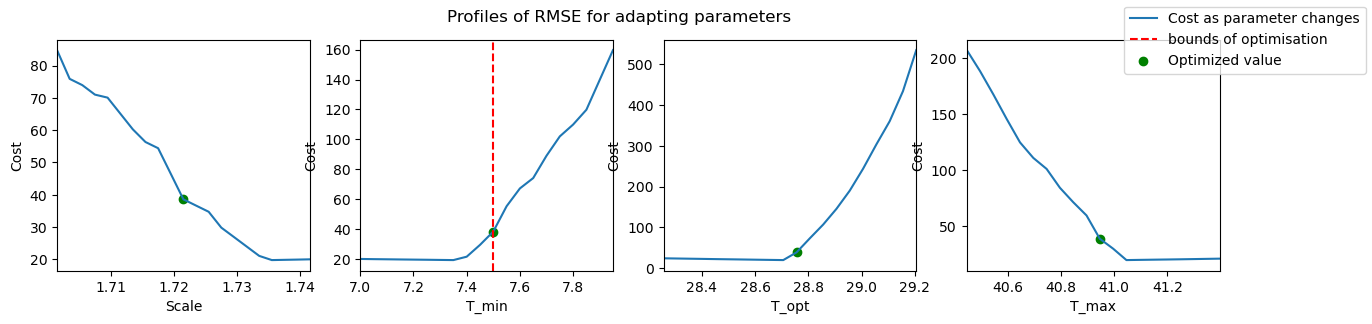

In [83]:
plot_profiles_at_minimum(fm2s[0], ds2, #fm2s[0]
                         lb=[0.01, 5, 28, 38], ub = [5, 7.5, 33, 44], 
                         response_type = 'Wang', phase_list = ['yellow ripeness'],
                         growing_period_length=185, new_unfinished_penalisation=True)

Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


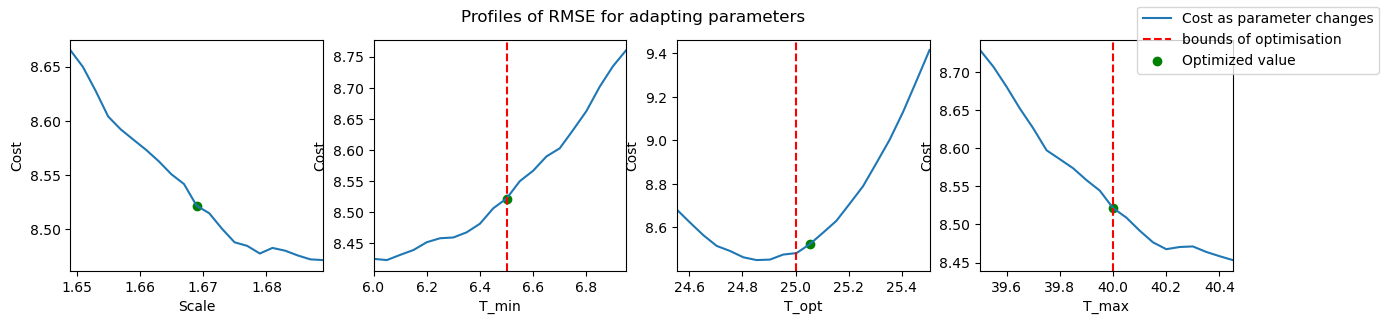

In [50]:
#train, test = train_test_split(ds2, test_size=0.5, random_state = 1)
#plot_profiles_at_minimum(fms[0],
#                         train,
#                         lb=[0.05, 5, 27, 38], ub = [1.5, 7.5, 33, 44], 
#                         response_type = 'Wang')
train, test = train_test_split(ds, test_size=0.5, random_state = 1)
plot_profiles_at_minimum(fms[0],
                         train,
                         lb = [0.01, 6.5, 25, 38.5], ub = [2, 12, 33, 40],
                         response_type = 'Wang', phase_list = ['beginning of flowering'])
#plot_profiles_at_minimum(fms[0],
#                         test,
#                         lb=[0.05, 5.5, 20, 35], ub = [1.5, 12, 33, 60], 
#                         response_type = 'Wang')

In [15]:
def run_GDD_and_scatter_plot(x, ds, driver_variable, latlon_proj = True, response_type = 'Trapezoid', phase_list = ['beginning of flowering'], exclude_unfinished = False,
                             growing_period_length = 300):
    #resps = [lambda x: coeff_1*modelling_fctns.Wang_Engel_Temp_response(x, 2, 28, 36), 
    #         lambda x: coeff_2*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36),
    #         lambda x: coeff_3*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36),
    #         lambda x: coeff_3*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36)]
    thresholds = [100]
    if response_type == 'Trapezoid':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Trapezoid_Temp_response(meantemp, x[1], x[2], x[3], x[4])
    elif response_type == 'Wang':
        def response(meantemp):
            #return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])
            return x[0]*modelling_fctns.Wang_Engel_Temp_response(meantemp, x[1], x[2], x[3])

    ## Initiate development time storage object - a list with a value for all the stations, that will change over time and be stored in a list.
    t_dev = np.zeros(len(ds)) #Continuous development time. When this passes through some thresholds then have change in phase.
    dev_time_series = [t_dev.copy()]
    ## Make sure driver dataset uses station id to index this dimension
    
    #Run model
    for day in range(growing_period_length):
        # Pull values for temperature out of data frame
        driver_values = ds[f'temperature at day {day}']
        # Calculate the response for each of these temperatures and add it to the total accumulated temperature
        t_dev += response(driver_values)#, t_dev)
        #Store the accumulated temperature in an array
        dev_time_series.append(t_dev.copy())

    # Add the year and station codes for indexing later and to check that extracting values didn't mix up indexes
    dev_time_series.append(ds['Referenzjahr'].values)
    dev_time_series.append(ds['Stations_id'].values)
    #print([p.shape for p in dev_time_series])
    model_dev_time_series = np.array(dev_time_series)
    #driver_array['Development Time'] = (('days from emergence', 'Emergence observation'), model_dev_time_series)
    column_names = np.concatenate([np.array([f'modelled time to {phase}' for phase in phase_list]), ['Referenzjahr'], ['Stations_id']])
    phase_dates_array = np.zeros((len(thresholds), model_dev_time_series.shape[1]))
    for obs_index in range(model_dev_time_series.shape[1]):
        phase_dates_array[:, obs_index] = np.digitize(thresholds, model_dev_time_series[:-2, obs_index].astype(np.float64))    
    #print(phase_dates_array)
    phase_dates_array = np.concatenate([phase_dates_array, [model_dev_time_series[-2]], [model_dev_time_series[-1]]], axis=0)
    phase_dates_array = pd.DataFrame(phase_dates_array.T, columns = column_names)
    comparison_array = ds.merge(phase_dates_array, how='left', on=['Referenzjahr', 'Stations_id']).dropna()
    fig, axs = plt.subplots(1, len(phase_list), figsize = (len(phase_list)*5, 5))
    for phase_index, phase in enumerate(phase_list):
        number_unfinished = (comparison_array[f'modelled time to {phase}'] >= growing_period_length).sum()
        number_total = len(comparison_array)
        print(f'{number_unfinished} stations out of {number_total} did not reach the end of phase \'{phase}\'')
        if exclude_unfinished:
            comparison_array = comparison_array[comparison_array[f'modelled time to {phase}'] < growing_period_length].dropna()
        comparison_array[f'observed time to {phase}'] = comparison_array[f'observed time to {phase}'].dt.days
        if len(phase_list) == 1:
            sns.regplot(x=f'modelled time to {phase}', y=f'observed time to {phase}', data=comparison_array, ax=axs,
                        scatter_kws={'alpha':0.5, 's':6})
        else:
            sns.regplot(x=f'modelled time to {phase}', y=f'observed time to {phase}', data=comparison_array, ax=axs[phase_index],
                        scatter_kws={'alpha':0.5, 's':6})
    rsquared = r2_score(comparison_array[f'observed time to {phase}'], comparison_array[f'modelled time to {phase}'])
    print(f'R^2 value for model: {rsquared}')
    return comparison_array

In [65]:
print(run_GDD_and_get_RMSE(fm2s[0], ds2, 't2m', response_type = 'Wang', phase_list = ['yellow ripeness'], new_unfinished_penalisation=True),
      run_GDD_and_get_RMSE(fm2s[0], ds2, 't2m', response_type = 'Wang', phase_list = ['yellow ripeness'], new_unfinished_penalisation=False))

0 7767
21.37204687891441 28.512367772840147


In [31]:
canm['temp mean'] = canm[[f'temperature at day {day}' for day in range(185)]].mean(axis=1)

In [33]:
ca['temp mean'] = ca[[f'temperature at day {day}' for day in range(185)]].mean(axis=1)

In [38]:
print(ca['temp mean'].std(), canm['temp mean'].std())

1.0500583242020791 0.3395458100742532


In [44]:
def get_station_locations(dataset, ds_stations):
    ds_stations.index = ds_stations['Stations_id']
    lat = [ds_stations._get_value(row, col) for row, col in zip(dataset['Stations_id'], ['geograph.Breite' for count in range(len(dataset))])] #station_data.lookup(row_labels = dataset['Stations_id'], col_labels = ['geograph.Breite'])
    lon = [ds_stations._get_value(row, col) for row, col in zip(dataset['Stations_id'], ['geograph.Laenge' for count in range(len(dataset))])] #station_data._lookup(dataset['Stations_id'], ['geograph.Laenge'])
    dataset['lat'] = lat
    dataset['lon'] = lon
    #dataset['lat'] = dataset['lat'].map(lambda x: x[0] if isinstance(x, np.float64) == False else x)
    #dataset['lon'] = dataset['lon'].map(lambda x: x[0] if isinstance(x, np.float64) == False else x)
    return dataset

In [45]:
canm = get_station_locations(canm, Maize_set.station_data)

In [48]:
canm[['lat', 'lon', 'Referenzjahr']].to_csv('Saved_files/canm_latlon.csv')

In [36]:
canm['Referenzjahr'].unique()

array([2004., 2010., 2012., 2015., 2011., 2014., 2007., 2002., 2008.,
       2020., 2016.])

In [21]:
canm = ca.where(ca['modelled time to yellow ripeness'] ==186).dropna()

253 stations out of 7887 did not reach the end of phase 'yellow ripeness'
R^2 value for model: -0.9864968905194105


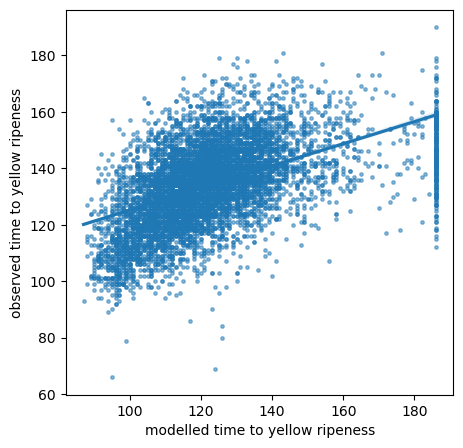

In [16]:
ca = run_GDD_and_scatter_plot(fm2s[0], ds2, 't2m', response_type='Wang', phase_list = ['yellow ripeness'], exclude_unfinished=False, growing_period_length=185)

256 stations out of 7887 did not reach the end of phase 'yellow ripeness'
R^2 value for model: -0.7674208746155731


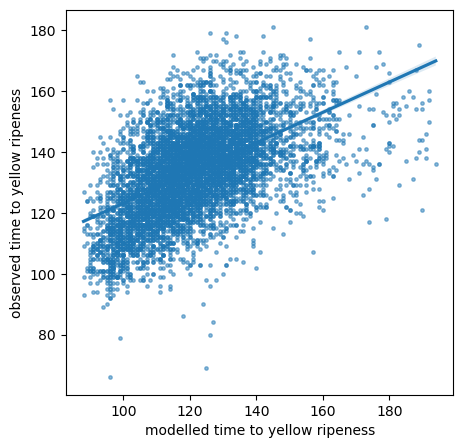

In [79]:
run_GDD_and_scatter_plot(fm2s[0], ds2, 't2m', response_type='Wang', phase_list = ['yellow ripeness'], exclude_unfinished=True, growing_period_length=195)

R^2 value for model: 0.3189426382292656


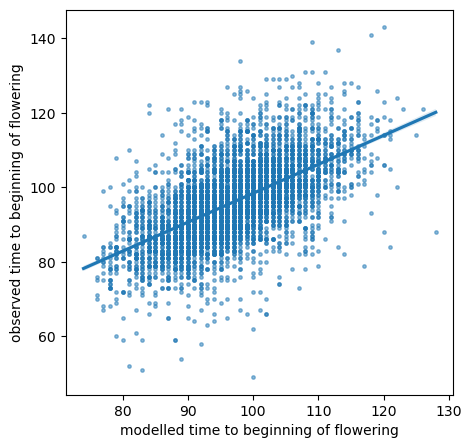

In [55]:
run_GDD_and_scatter_plot(fms[0], test, 't2m', response_type = 'Wang', phase_list = ['beginning of flowering'])

In [ ]:
def get_starting_points_from_samples(samples, dist_threshold = 3):
    reduced_interesting_x1s = [samples[0]]
    for x1 in samples[1:]:
        #print((x1 - samples[0])[:4])
        dist_to_saved_guesses = min([np.linalg.norm((x1 - x0)[:4]) for x0 in reduced_interesting_x1s])
        if dist_to_saved_guesses > dist_threshold:
            reduced_interesting_x1s.append(x1)
            #print('added')
    return reduced_interesting_x1s

def hypercube_search(ds, xmins = np.array([4, 20, 28, 35]), 
                     xmaxs = np.array([12, 40, 40, 45]), 
                     N = 200, 
                     interesting_threshold = 16, great_threshold = 13, response_type = 'Trapezoid'):
    dists = xmaxs - xmins
    np.random.seed(10)
    hcube = scipy.stats.qmc.LatinHypercube(len(xmins))
    samples = hcube.random(n=N)
    interesting_initial_guesses = []
    great_initial_guesses = []
    #print(samples[1, :])
    #print(samples[1, :]*dists)
    count_tested = 0
    for sample_index in range(samples.shape[0]):
        x0 = xmins + samples[sample_index, :]*dists
        if response_type == 'Trapezoid':
            constraint_violation = x0[1] < x0[0] or x0[2] < x0[1] or x0[3] < x0[2]
        elif response_type == 'Wang':
            constraint_violation = x0[1] < x0[0] or x0[2] < x0[1]
        if constraint_violation:
            print(x0, 'goes against constraints')
            continue
        if response_type == 'Trapezoid':
            fixed_params = [x0[0], x0[1], x0[2], x0[3]]
        elif response_type == 'Wang':
            fixed_params = [x0[0], x0[1], x0[2]]
        x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x] + fixed_params, ds, 't2m', response_type=response_type),
                                            bounds = (0.05, 1.5),
                                            method='bounded',
                                            options = {'disp': 2})
        x1 = np.array([x_0.x] + fixed_params)
        opt_value = run_GDD_and_get_RMSE(x1, ds, 't2m', response_type=response_type)
        if opt_value < interesting_threshold: #ds['observed time to yellow ripeness'].dt.days.std() + 2:
            interesting_initial_guesses.append(x1)
            print('Look at this one!')
        if opt_value < great_threshold:
            great_initial_guesses.append(x1)
            print('THIS ONE IS ALREADY GREAT')
        print(x1)
        print(opt_value)
        count_tested += 1
    print(f'{count_tested} samples considered')
    return interesting_initial_guesses, great_initial_guesses




In [73]:
x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x] + fixed_params, ds, 't2m', response_type='Wang'),
                                            bounds = (0.05, 1.5),
                                            method='bounded',
                                            options = {'disp': 3})

T_min = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x_0.x, x] + fixed_params[1:], ds, 't2m', response_type='Wang'),
                                            bounds = (7, 11),
                                            method='bounded',
                                            options = {'disp': 3})
                        
T_opt = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x_0.x, T_min.x, x] + fixed_params[2:], ds, 't2m', response_type='Wang'),
                                            bounds = (26, 30),
                                            method='bounded',
                                            options = {'disp': 3})
T_max = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x_0.x, T_min.x, T_opt.x, x], ds, 't2m', response_type='Wang'),
                                            bounds = (38.5, 40),
                                            method='bounded',
                                            options = {'disp': 3})

x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x, T_min.x, T_opt.x, T_max.x], ds, 't2m', response_type='Wang'),
                                            bounds = (0.05, 1.5),
                                            method='bounded',
                                            options = {'disp': 3})


x_opt = [x_0.x, T_min.x, T_opt.x, T_max.x] + fixed_params[3:]

 
 Func-count     x          f(x)          Procedure
    1       0.603851      43.8466        initial
    2       0.946149      55.7355        golden
    3       0.392299      29.5879        golden
    4       0.261552      12.6211        golden
    5       0.180746      19.3375        golden
    6       0.262448      12.7596        parabolic
    7       0.235425      9.46823        parabolic
    8        0.21454      10.0376        golden
    9       0.229314       9.2489        parabolic
   10       0.228171      9.23973        parabolic
   11       0.227697      9.23632        parabolic
   12       0.222672      9.35581        golden
   13       0.225778      9.25385        golden
   14       0.226964        9.234        golden
   15       0.226857      9.23501        parabolic
   16       0.227225      9.23433        parabolic
   17       0.227064      9.23512        golden
   18       0.226923      9.23475        golden
   19       0.227002      9.23233        golden
   20       0

In [60]:
run_GDD_and_get_RMSE_derivs(fms[0], train, 't2m', response_type='Wang')

C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_19260\3007397879.py:3: RuntimeWarning: invalid value encountered in power
  h = ((T - T_min)/(T_opt - T_min))**alpha
c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta


[7.492240349218835,
 -0.6767938364114846,
 -2.5562891835800214,
 0.9056996500500528]

In [78]:
rar['optimised scale'] = np.round(rar['optimised scale'], 3)
rar['RMSE'] = np.round(rar['RMSE'], 2)

In [79]:
rar

,Tmin,Topt,Tmax,optimised scale,RMSE
0,8,27,38,0.249,9.53
0,8,27,39,0.233,9.32
0,8,27,40,0.222,9.15
0,8,28,38,0.298,10.07
0,8,28,39,0.275,9.76
0,8,28,40,0.256,9.52
0,8,29,38,0.374,10.78
0,8,29,39,0.333,10.34
0,8,29,40,0.305,9.99
0,9,27,38,0.262,9.84


In [61]:
fms[0]

array([ 0.2246234 ,  8.00073464, 27.00280886, 39.49901171])

Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


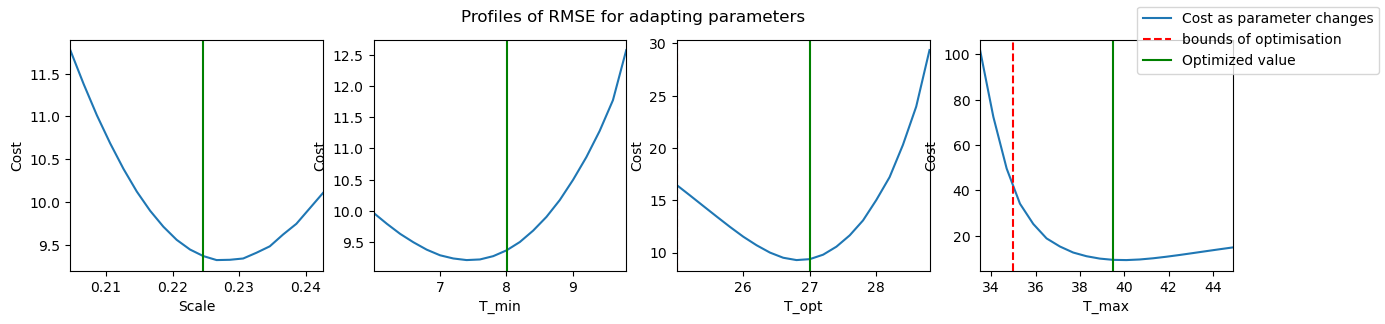

In [64]:
plot_profiles_at_minimum(fms[0],
                         test,
                         lb=[0.05, 5.5, 25, 35], ub = [1.5, 12, 33, 60], 
                         response_type = 'Wang')

In [31]:
train, test = train_test_split(ds, test_size=0.5)
print(1 - ((run_GDD_and_get_RMSE([0.1, 6.15128534, 25.94213131, 44.12867083], train, 't2m', response_type='Wang')**2)/train['observed time to yellow ripeness'].dt.days.var()))

-0.21204663258694922


In [23]:
print(run_GDD_and_get_RMSE([0.09997401, 6.15128534, 25.94213131, 44.12867083], train, 't2m', response_type='Wang'))
print(run_GDD_and_get_RMSE([0.09997401, 6.15128534, 25.94213131, 44.12867083], test, 't2m', response_type='Wang'))

NameError: name 'train' is not defined

In [73]:
fms

[array([ 0.10425149,  5.94553231, 25.74749618, 43.31336403]),
 array([ 0.54478853, 10.32730747, 29.29964803, 35.77143008])]

Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max
Plotting Scale
Plotting T_min
Plotting T_opt
Plotting T_max


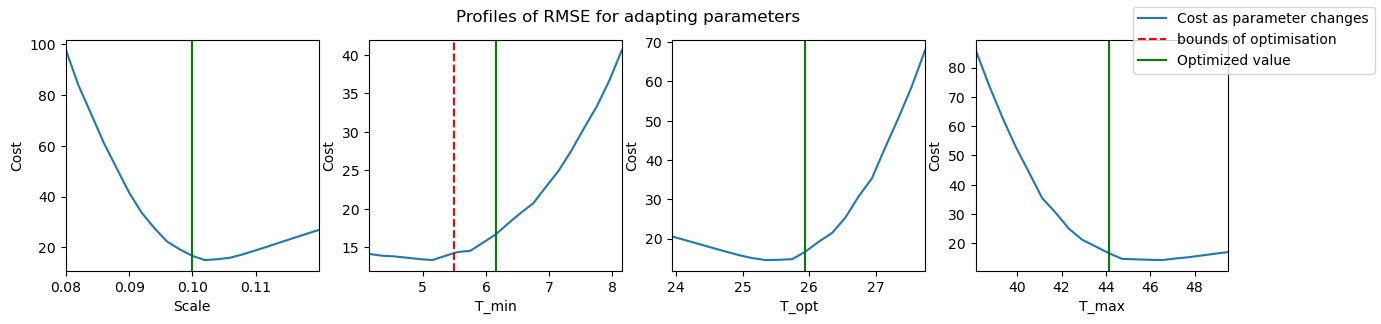

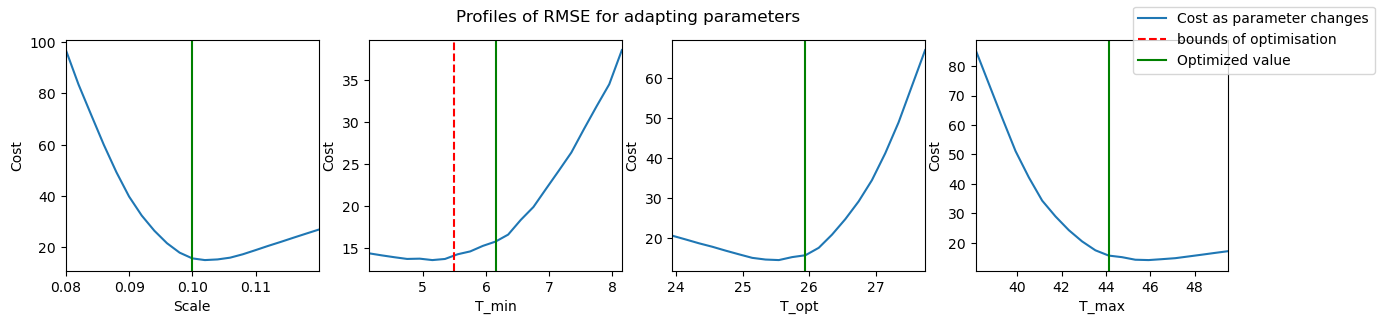

In [72]:
train, test = train_test_split(ds, test_size=0.5)
plot_profiles_at_minimum([0.09997401, 6.15128534, 25.94213131, 44.12867083],
                         train,
                         lb=[0.05, 5.5, 20, 35], ub = [1.5, 12, 33, 60], 
                         response_type = 'Wang')
plot_profiles_at_minimum([0.09997401, 6.15128534, 25.94213131, 44.12867083],
                         test,
                         lb=[0.05, 5.5, 20, 35], ub = [1.5, 12, 33, 60], 
                         response_type = 'Wang')

In [108]:
interesting_samples, great_samples = hypercube_search(ds,
                                                      xmins = np.array([5.5, 25, 25, 35]),
                                                      xmaxs = np.array([12, 35, 35, 45]),
                                                      N = 200,
                                                      interesting_threshold=16,
                                                      great_threshold=14)
print(great_samples)
if len(interesting_samples) > 15:
    interesting_samples = get_starting_points_from_samples(interesting_samples)



Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
[ 0.23837417 10.5394457  27.64324859 34.36036414 39.54069128]
30.613019300171057
[11.3635723  33.46776846 27.59631758 39.9947719 ] goes against constraints
[ 6.65061436 34.63034117 26.22013366 39.17578222] goes against constraints
[ 5.51116229 29.86165335 26.98609769 35.39222336] goes against constraints

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
Look at this one!
[ 0.13634088  5.70613084 25.62686258 33.97136085 39.43748453]
15.615232372999778
[ 8.19132437 33.84884841 30.078189   44.56488435] goes against constraints
[ 9.62706602 30.83148019 25.3558341  38.09502535] goes against constraints
[ 6.11266307 34.41625032 27.66544066 44.04746855] goes against constraints
[ 7.80820226 34.57685397 29.66360563 42.96480518] goes against constraints

Optimization terminated successfully;
The returned value satis

c:\ProgramData\anaconda3\envs\Data_Analysis\Lib\site-packages\scipy\optimize\_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.345999634035064
            Iterations: 4
            Function evaluations: 28
            Gradient evaluations: 4
[ 0.186593    5.68455928 33.13245866 33.73855007 39.84774714] [ 0.18656792  5.6844691  33.13220271 33.73852699 39.84774714] [2.50819889e-05 9.01747674e-05 2.55946261e-04 2.30791215e-05
 0.00000000e+00]
15.42583151816802
-0.20435207143814105
Optimization terminated successfully    (Exit mode 0)
            Current function value: 16.30048212442777
            Iterations: 1
            Function evaluations: 12
            Gradient evaluations: 1
[ 0.18732693  5.75048783 32.97944579 34.08315591 42.6653809 ] [ 0.18732692  5.75048798 32.9794459  34.08315591 42.6653809 ] [ 1.58498295e-08 -1.53003833e-07 -1.16288291e-07  0.00000000e+00
  0.00000000e+00]
15.41170788427791
-0.20214771172442703
Optimization terminated successfully    (Exit mode 0)
            Current function value: 15.61592

IndexError: list index out of range

In [115]:
print(run_GDD_and_get_RMSE(final_minima[0], train, 't2m'))

15.930359232970229


Optimization terminated successfully    (Exit mode 0)
            Current function value: 14.542095228414887
            Iterations: 11
            Function evaluations: 48
            Gradient evaluations: 11
[ 0.13634088  5.70613084 25.62686258 33.97136085 39.43748453] [ 0.1308844   5.66833244 25.47994907 33.97136085 39.43748453] [0.00545647 0.0377984  0.14691352 0.         0.        ]
17.286866758665045
-0.4686015509010626


c:\ProgramData\anaconda3\envs\Data_Analysis\Lib\site-packages\scipy\optimize\_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 14.573418581375547
            Iterations: 5
            Function evaluations: 30
            Gradient evaluations: 5
[ 0.186593    5.68455928 33.13245866 33.73855007 39.84774714] [ 0.18504518  5.69948562 33.14079524 33.74086582 39.84774714] [ 0.00154782 -0.01492634 -0.00833658 -0.00231575  0.        ]
17.367112365855505
-0.4822676885353805


c:\ProgramData\anaconda3\envs\Data_Analysis\Lib\site-packages\scipy\optimize\_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 14.704335713973538
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
[ 0.18732693  5.75048783 32.97944579 34.08315591 42.6653809 ] [ 0.18545195  5.76768584 32.98963757 34.08324857 42.6653809 ] [ 1.87498544e-03 -1.71980098e-02 -1.01917862e-02 -9.26631425e-05
  0.00000000e+00]
17.529475497309164
-0.510112340663516
Optimization terminated successfully    (Exit mode 0)
            Current function value: 14.275476793023813
            Iterations: 8
            Function evaluations: 39
            Gradient evaluations: 8
[ 0.16190504  5.5339666  29.42998333 32.38961256 36.79997689] [ 0.15788716  5.55685419 29.4234762  32.38961256 36.79997689] [ 0.00401787 -0.0228876   0.00650714  0.          0.        ]
17.114066016157036
-0.43938780576662717
Optimization terminated successfully    (Exit mode 0)
            Current function value: 14.22995403816369
     

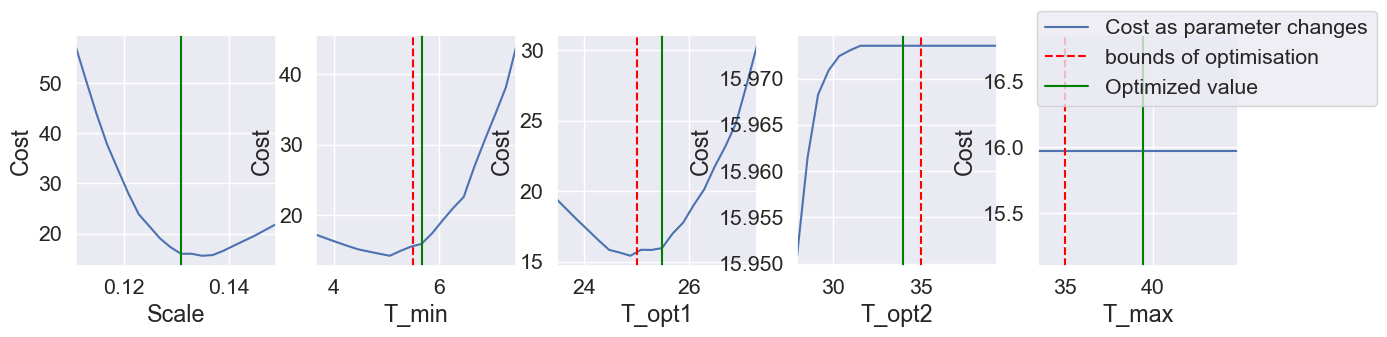

In [110]:
final_minima = local_opt(interesting_samples, ds, lower_bounds = [0.05, 5.5, 25, 25, 35], upper_bounds = [1, 12, 35, 35, 60])


0.11088440198808756
0.11288440198808757
0.11488440198808757
0.11688440198808757
0.11888440198808757
0.12088440198808757
0.12288440198808757
0.12488440198808758
0.1268844019880876
0.1288844019880876
0.1308844019880876
0.1328844019880876
0.1348844019880876
0.1368844019880876
0.1388844019880876
0.1408844019880876
0.1428844019880876
0.1448844019880876
0.1468844019880876
0.1488844019880876
3.6683324408376485
3.8683324408376487
4.068332440837649
4.268332440837649
4.468332440837649
4.668332440837649
4.86833244083765
5.06833244083765
5.26833244083765
5.46833244083765
5.66833244083765
5.8683324408376505
6.068332440837651
6.268332440837651
6.468332440837651
6.668332440837651
6.868332440837651
7.0683324408376516
7.268332440837652
7.468332440837652
23.479949066874784
23.679949066874784
23.879949066874783
24.079949066874782
24.27994906687478
24.47994906687478
24.67994906687478
24.87994906687478
25.07994906687478
25.279949066874778
25.479949066874777
25.679949066874777
25.879949066874776
26.07994906

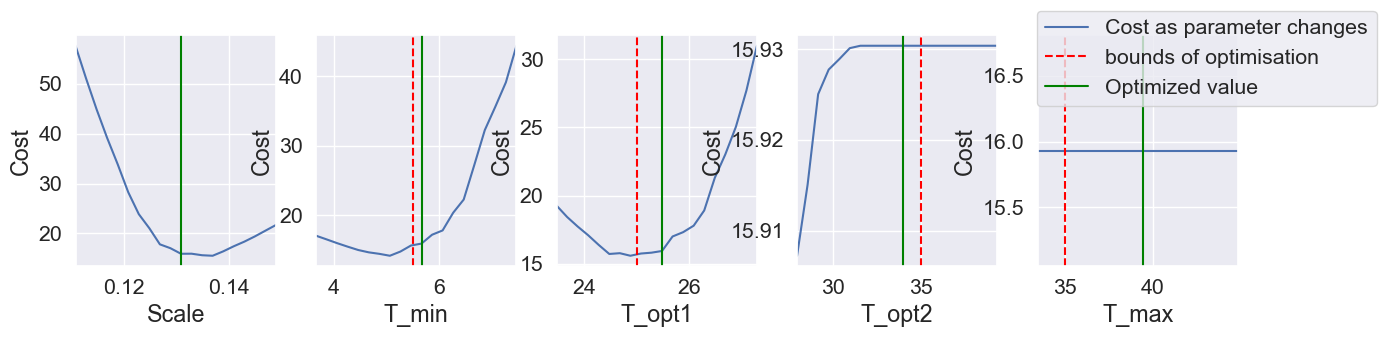

In [112]:
plot_profiles_at_minimum(final_minima[0], train,
                         lb = [0.05, 5.5, 25, 25, 35], 
                         ub = [1, 12, 35, 35, 60])

In [102]:
x_min = final_x1s2[1]


Text(0.5, 0.98, 'Profiles of RMSE for adapting parameters')

0.08242675765624066
0.08442675765624066
0.08642675765624067
0.08842675765624067
0.09042675765624067
0.09242675765624067
0.09442675765624067
0.09642675765624067
0.09842675765624068
0.10042675765624068
0.10242675765624068
0.10442675765624068
0.10642675765624068
0.10842675765624069
0.11042675765624069
0.11242675765624069
0.11442675765624069
0.11642675765624069
0.1184267576562407
0.1204267576562407
0.1224267576562407
2.0000000000000124
2.2000000000000126
2.400000000000013
2.600000000000013
2.800000000000013
3.0000000000000133
3.2000000000000135
3.4000000000000137
3.600000000000014
3.800000000000014
4.000000000000014
4.200000000000014
4.400000000000015
4.600000000000015
4.800000000000015
5.000000000000015
5.200000000000015
5.4000000000000155
5.600000000000016
5.800000000000016
19.810913719687942
20.01091371968794
20.21091371968794
20.41091371968794
20.61091371968794
20.81091371968794
21.010913719687938
21.210913719687937
21.410913719687937
21.610913719687936
21.810913719687935
22.0109137196

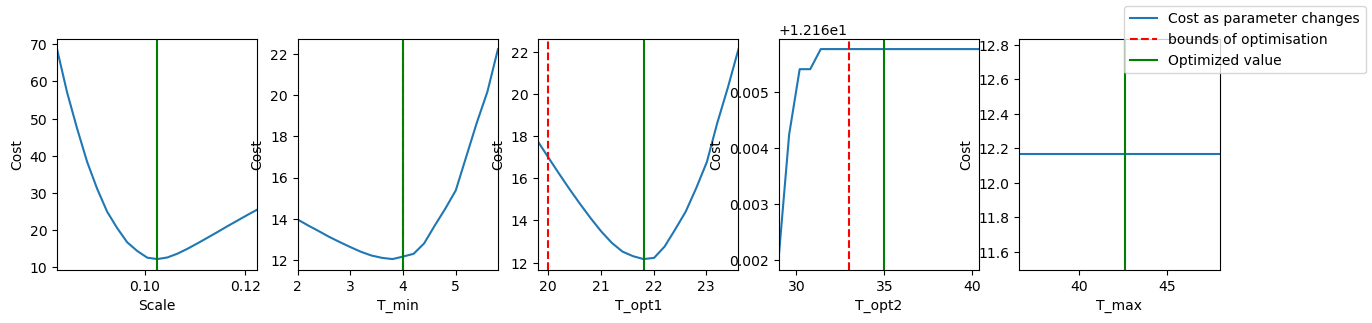

In [103]:
plot_profiles_at_minimum(final_x1s2[1])

In [80]:
reduced_interesting_x1s
for x0 in reduced_interesting_x1s:
    print(x0, run_GDD_and_get_RMSE(x0, ds, 't2m'))
final_x1s2

[ 0.10920751  3.39973214 23.60790123 28.16031479 41.88550289] 11.969341440912611
[ 0.1037875   2.37376929 23.24891052 35.67268673 35.8954319 ] 11.514528257229955
[ 0.17882008  4.31303768 34.81034284 39.24539153 40.1819033 ] 13.173014354159335
[ 0.09704506  2.04840282 21.9187284  34.98362554 42.60489865] 11.320283692114574
[ 0.12784533  5.65469929 24.45127921 39.94820629 40.42418849] 15.33484630541703
[ 0.15180861  4.82282878 29.24055298 33.20190399 39.12602165] 13.946426161944965
[ 0.13055998  2.40990545 28.73666555 34.89319438 44.6571934 ] 11.751776890738103
[ 0.18919048  5.25705597 34.15255287 34.60605929 35.70366404] 14.784854691579525
[ 0.11520392  5.75236434 22.47451598 28.85410287 35.34905923] 14.86323110946785


[array([ 0.10792751,  4.        , 23.05306568, 35.        , 35.8954319 ]),
 array([ 0.10242676,  4.        , 21.81091372, 34.98362554, 42.60489865]),
 array([ 0.09249345,  4.        , 20.        , 26.68898044, 35.        ])]

In [20]:
x0 = np.array([0.125, 6, 28, 32, 45])
for count in range(3):
    x_0 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x, x0[1], x0[2], x0[3], x0[4]], ds, 't2m'),
                                        bounds = (0.05, 0.5),
                                        method='bounded',
                                        options = {'disp': 2})
    x0 = np.array([x_0.x, x0[1], x0[2], x0[3], x0[4]])
    print(x0)
    x_1 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x0[0], x, x0[2], x0[3], x0[4]], ds, 't2m'),
                                        bounds = (0, min(x0[2], 20)),
                                        method='bounded',
                                        options = {'disp': 2})
    x0 = [x0[0], x_1.x, x0[2], x0[3], x0[4]]
    print(x0)
    x_2 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x0[0], x0[1], x, x0[3], x0[4]], ds, 't2m'),
                                        bounds = (max(x0[1], 12), min(x0[3], 40)),
                                        method='bounded',
                                        options = {'disp': 2})
    x0 = [x0[0], x0[1], x_2.x, x0[3], x0[4]]
    print(x0)
    x_3 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x0[0], x0[1], x0[2], x, x0[4]], ds, 't2m'),
                                        bounds = (max(x0[2], 30), min(x0[4], 50)),
                                        method='bounded',
                                        options = {'disp': 2})
    x0 = [x0[0], x0[1], x0[2], x_3.x, x0[4]]
    print(x0)
    x_4 = scipy.optimize.minimize_scalar(lambda x: run_GDD_and_get_RMSE([x0[0], x0[1], x0[2], x, x0[4]], ds, 't2m'),
                                        bounds = (max(x0[3], 30), 50),
                                        method='bounded',
                                        options = {'disp': 2})
    x0 = [x0[0], x0[1], x0[2], x0[3], x_4.x]
    print(x0)



Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
[ 0.15625543  6.         28.         32.         45.        ]

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
[0.15625542855494493, 5.834975229387588, 28.0, 32.0, 45.0]

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
[0.15625542855494493, 5.834975229387588, 28.0053481739408, 32.0, 45.0]

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
[0.15625542855494493, 5.834975229387588, 28.0053481739408, 44.999995938433585, 45.0]

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
[0.15625542855494493, 5.834975229387588, 28.0053481739408, 44.999995938433585, 49.999992964152305]

Optimization terminated successfully;
The r

In [22]:
x0 = np.array([0.125, 6, 28, 32, 45])
x0 = res.x
x0a, x1a, x2a, x3a, x4a = (0.05, 1, 1, 1, 1)
x0b, x1b, x2b, x3b, x4b = (0, -1, -1, -1, -1)
for x1 in [x0 + np.array([x0a, x1a, x2a, x3a, x4a]),
           x0 + np.array([x0b, x1a, x2a, x3a, x4a]),
           x0 + np.array([x0a, x1b, x2a, x3a, x4a]),
           x0 + np.array([x0b, x1b, x2a, x3a, x4a]),
           x0 + np.array([x0a, x1a, x2b, x3a, x4a]),
           x0 + np.array([x0b, x1a, x2b, x3a, x4a]),
           x0 + np.array([x0a, x1b, x2b, x3a, x4a]),
           x0 + np.array([x0b, x1b, x2b, x3a, x4a]),
           x0 + np.array([x0a, x1a, x2a, x3b, x4a]),
           x0 + np.array([x0b, x1a, x2a, x3b, x4a]),
           x0 + np.array([x0a, x1b, x2a, x3b, x4a]),
           x0 + np.array([x0b, x1b, x2a, x3b, x4a]),
           x0 + np.array([x0a, x1a, x2b, x3b, x4a]),
           x0 + np.array([x0b, x1a, x2b, x3b, x4a]),
           x0 + np.array([x0a, x1b, x2b, x3b, x4a]),
           x0 + np.array([x0b, x1b, x2b, x3b, x4a])]:
    print(run_GDD_and_get_RMSE(x1, ds, 't2m'))

30.547131488119575
21.960765565326874
36.60720098118853
11.645682334683475
36.98961343731713
12.234615579806757
42.42457366518426
13.849112823894844
30.547131488119575
21.960765565326874
36.60720098118853
11.645682334683475
36.98961343731713
12.234615579806757
42.42457366518426
13.849112823894844


In [29]:
c_array = run_GDD_and_get_RMSE_derivs(res.x,ds.drop_duplicates(), 't2m')

In [21]:
print(run_GDD_and_get_RMSE(res.x, ds, 't2m')**2/ds['observed time to yellow ripeness'].dt.days.var())

0.6989399689399907


In [105]:
x0 = np.array([11.36, 5.757, 22.68, 25.17, 45])
x0 = np.array([11.36, 5.757, 22.68, 35, 45])
x0 = np.array([1, 5.757, 26, 45])
x0 = fms[0]
grad_algebraic = run_GDD_and_get_RMSE_derivs(x0, ds.drop_duplicates(), 't2m', response_type = 'Wang')
for h in [0.00005, 0.0001, 0.001, 0.01, 0.1]:
    grads_numeric0 = []
    grads_numeric1 = []
    grads_numeric2 = []
    for x_index in range(len(x0)):
        x_plus_h = x0
        x_minus_h =  x0
        h_perturb = [0 for count in range(len(x0))]
        h_perturb[x_index] = h
        h_perturb = np.array(h_perturb)
        x_plus_h = x_plus_h + h_perturb
        x_minus_h = x_minus_h - h_perturb
        #print(x_minus_h, x_plus_h)
        grad_numeric = (run_GDD_and_get_RMSE(x_plus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang') - run_GDD_and_get_RMSE(x_minus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang'))/(2*h)
        grads_numeric0.append(grad_numeric)
        grad_numeric = (run_GDD_and_get_RMSE(x_plus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang') - run_GDD_and_get_RMSE(x0, ds.drop_duplicates(), 't2m', response_type = 'Wang'))/h
        grads_numeric1.append(grad_numeric)
        grad_numeric = (run_GDD_and_get_RMSE(x0, ds.drop_duplicates(), 't2m', response_type = 'Wang') - run_GDD_and_get_RMSE(x_minus_h, ds.drop_duplicates(), 't2m', response_type = 'Wang'))/h
        grads_numeric2.append(grad_numeric)
    
    print(grads_numeric0, grads_numeric1, grads_numeric2, grad_algebraic)

c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta
C:\Users\wlwc1989\AppData\Local\Temp\ipykernel_4140\3007397879.py:3: RuntimeWarning: invalid value encountered in power
  h = ((T - T_min)/(T_opt - T_min))**alpha


[11.538916781557162, -2.7515914849729484, -4.881849400995009, 2.840355006483719] [11.183542651274081, -3.372936448684527, -5.236951900791098, 2.041486699795314] [11.894290911840244, -2.1302465212613697, -4.526746901198919, 3.639223313172124] [5.562070324518179, -3.694937357776243, -10.321251056041037, 3.454512138822692]


KeyboardInterrupt: 

In [295]:
c_array = run_GDD_and_get_RMSE_derivs([7, 4, 12, 25, 45],ds.drop_duplicates(), 't2m')
#c_array = run_GDD_and_get_RMSE_derivs([1.136e+00, 5.757e+00, 2.268e+01, 2.517e+01, 4.500e+01],ds.drop_duplicates(), 't2m')

In [296]:
c_array#2.drop_duplicates()

[1.933311846964822, -0.578554352201605, -0.9637778732950953, -0.0, -0.0]

In [200]:
d3 = d_array2.merge(d_array1, on=['Referenzjahr', 'Stations_id'], how='left')#.where(d_array2['Referenzjahr'] != d_array1['Referenzjahr']).dropna()#

MergeError: Merge keys are not unique in either left or right dataset; not a one-to-one merge

In [203]:
ds[['Stations_id', 'Referenzjahr']].drop_duplicates()#merge(d_array1, on=['Referenzjahr', 'Stations_id'], )#.where(d3['Referenzjahr'] != d_array1['Referenzjahr']).dropna()#

,Stations_id,Referenzjahr
0,7521.0,2022.0
1,7521.0,2023.0
2,7532.0,2022.0
3,7532.0,2023.0
4,7592.0,2022.0
...,...,...
5779,19755.0,2016.0
5781,19914.0,2015.0
5782,19914.0,2016.0
5784,19914.0,2018.0


In [251]:
T_min_values = np.arange(0, 7, 0.5)
T_opt1_values = np.arange(15, 23, 0.5)
T_mins, T_opt1s = np.meshgrid(T_min_values, T_opt1_values)
RMSEs = np.zeros(T_mins.shape)
for i in range(T_mins.shape[0]):
    print(T_opt1_values[i])
    for j in range(T_mins.shape[1]):
        RMSEs[i, j] = run_GDD_and_get_RMSE(np.array([10, T_mins[i, j], T_opt1s[i, j], 35, 45]), ds, 't2m')

15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5


In [73]:
scale_values = np.arange(0.7, 1.3, 0.05)
T_opt1_values = np.arange(15, 25, 0.5)
scales, T_opt1s = np.meshgrid(scale_values, T_opt1_values)
RMSE2s = np.zeros(T_opt1s.shape)
for i in range(T_opt1s.shape[0]):
    print(T_opt1_values[i])
    for j in range(T_opt1s.shape[1]):
        RMSE2s[i, j] = run_GDD_and_get_RMSE(np.array([scales[i, j], 0, T_opt1s[i, j], 35, 45]), ds, 't2m')

15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5


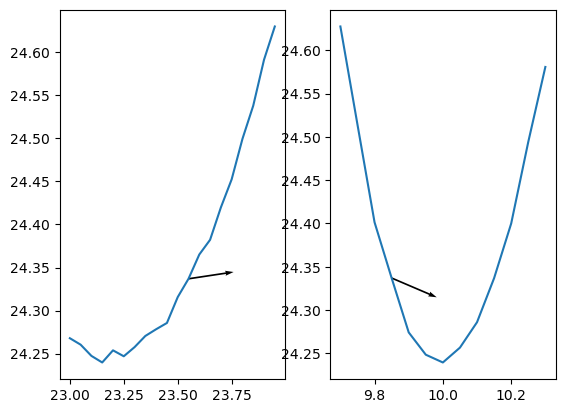

In [272]:
fig, ax = plt.subplots(1, 2)
scaleindex = 3
Toptindex = 11
scale_values = np.arange(9.7, 10.3, 0.05)
T_opt1_values = np.arange(23, 24, 0.05)
scales, T_opt1s = np.meshgrid(scale_values, T_opt1_values)
derivs = run_GDD_and_get_RMSE_derivs(np.array([scales[Toptindex, scaleindex], 0, T_opt1s[Toptindex, scaleindex], 35, 45]), ds, 't2m')
ax[0].plot(T_opt1s[:, scaleindex], RMSE2s[:, scaleindex], )
ax[0].quiver(T_opt1s[Toptindex, scaleindex], RMSE2s[Toptindex, scaleindex], 1, derivs[2], scale = 5)
ax[1].plot(scales[Toptindex, :], RMSE2s[Toptindex, :], )
ax[1].quiver(scales[Toptindex, scaleindex], RMSE2s[Toptindex, scaleindex], 1, derivs[0], scale = 5)

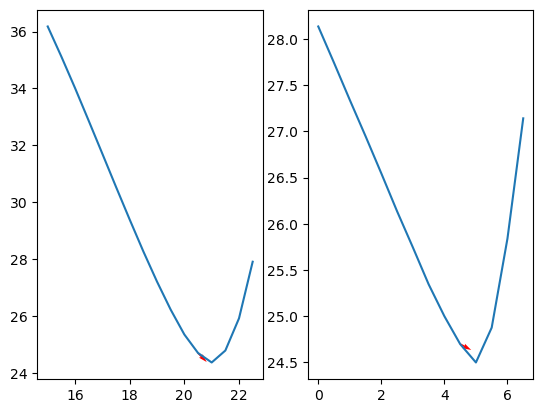

In [260]:
T_min_values = np.arange(0, 7, 0.5)
T_opt1_values = np.arange(15, 23, 0.5)
T_mins, T_opt1s = np.meshgrid(T_min_values, T_opt1_values)
fig, ax = plt.subplots(1, 2)
Tminindex = 11
Toptindex = 9
derivs = run_GDD_and_get_RMSE_derivs(np.array([10, T_mins[Tminindex, Toptindex], T_opt1s[Tminindex, Toptindex], 35, 45]), ds, 't2m')
ax[0].plot(T_opt1s[:, Toptindex], RMSEs[:, Toptindex], )
ax[0].quiver(T_opt1s[Tminindex, Toptindex], RMSEs[Tminindex, Toptindex], 5, 5*derivs[2], color='red')
ax[1].plot(T_mins[Tminindex, :], RMSEs[Tminindex, :], )
ax[1].quiver(T_mins[Tminindex, Toptindex], RMSEs[Tminindex, Toptindex], 5, 5*derivs[1], color='red')

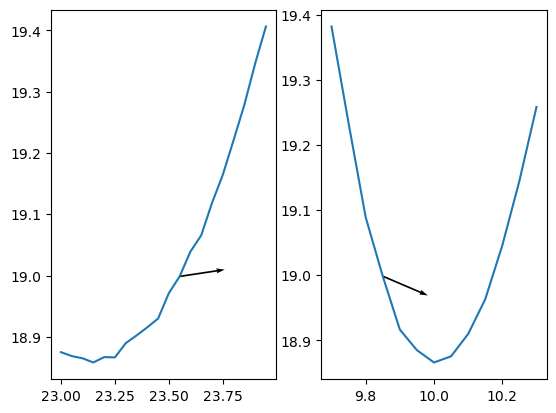

18.85502652987415 T_opt1 = 23.950000000000014 scale = 10.300000000000008


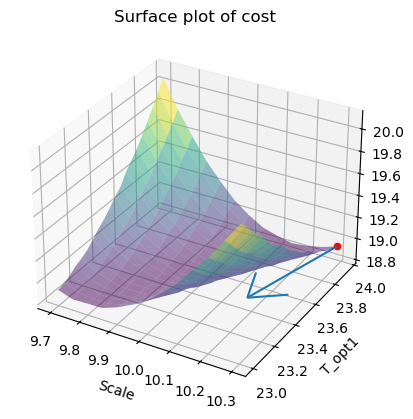

In [230]:
fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(scales, T_opt1s, RMSE2s, cmap='viridis', alpha = 0.5)
ax.set(xlabel = 'Scale')
ax.set(ylabel = 'T_opt1')
ax.set_title('Surface plot of cost')
mindex = np.unravel_index(np.argmin(RMSE2s), T_opt1s.shape)
mindex = (-1, -1)
ax.scatter(scales[mindex], T_opt1s[mindex], RMSE2s[mindex], color = 'red', s=20)
print(RMSE2s.min(), f'T_opt1 = {T_opt1s[mindex]}', f'scale = {scales[mindex]}')


# Make the direction data for the arrows
derivs = run_GDD_and_get_RMSE_derivs(np.array([scales[mindex], 0, T_opt1s[mindex], 35, 45]), ds, 't2m')

ax.quiver(scales[mindex], T_opt1s[mindex], RMSE2s[mindex], -derivs[0], -derivs[2], -3, length=1, normalize=True)

18.85502652987415 T_opt1 = 23.450000000000006 scale = 9.950000000000003


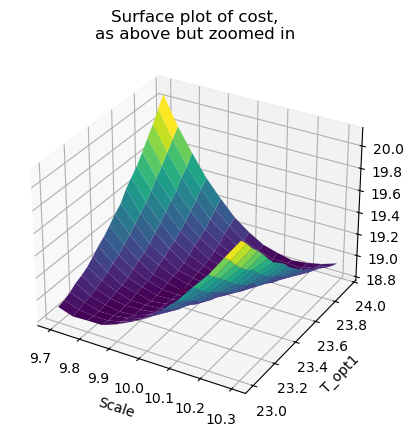

In [95]:
fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(scales, T_opt1s, RMSE2s, cmap='viridis')
ax.set(xlabel = 'Scale')
ax.set(ylabel = 'T_opt1')
ax.set_title('Surface plot of cost,\nas above but zoomed in')
mindex = np.unravel_index(np.argmin(RMSE2s), T_opt1s.shape)
ax.scatter(scales[mindex], T_opt1s[mindex], RMSE2s[mindex], color = 'red')
print(RMSE2s.min(), f'T_opt1 = {T_opt1s[mindex]}', f'scale = {scales[mindex]}')

In [57]:
ds['Referenzjahr'].min()

2019.0

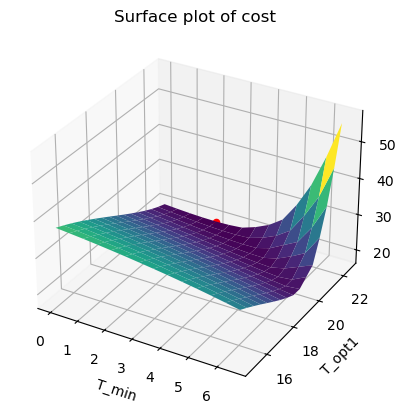

In [86]:
fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(T_mins, T_opt1s, RMSEs, cmap='viridis')
ax.set(xlabel = 'T_min', ylabel = 'T_opt1')
ax.set_title('Surface plot of cost')
mindex = np.unravel_index(np.argmin(RMSEs), T_mins.shape)
ax.scatter(T_mins[mindex], T_opt1s[mindex], RMSEs[mindex], color = 'red')
print(RMSEs.min(), f'T_opt1 = {T_opt1s[mindex]}', f'T_min = {T_mins[mindex]}')

In [54]:
mindex = np.unravel_index(np.argmin(RMSEs), T_mins.shape)
print(mindex)
print(T_mins[np.argmin(RMSEs, keepdims=True)])

(44, 0)


IndexError: index 2200 is out of bounds for axis 0 with size 50

In [ ]:
ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([x[1] - 0, 
                                         10 - x[1], 
                                         x[2] - 10,
                                         25 - x[2],
                                         x[3] - 20,
                                         35 - x[3],
                                         x[4] - 35,
                                         50 - x[4],
                                         x[2] - x[1],
                                         x[3] - x[2],
                                         x[4] - x[3]]),
             'jac' : lambda x: np.array([[0, 1, 0, 0, 0],
                                         [0, -1, 0, 0, 0],
                                         [0, 0, 1, 0, 0],
                                         [0, 0, -1, 0, 0],
                                         [0, 0, 0, 1, 0],
                                         [0, 0, 0, -1, 0],
                                         [0, 0, 0, 0, 1],
                                         [0, 0, 0, 0, -1],
                                         [0, -1, 1, 0, 0],
                                         [0, 0, -1, 1, 0],
                                         [0, 0, 0, -1, 1]])}

In [293]:

#x_opt = scipy.optimize.shgo(lambda x: run_GDD_and_get_RMSE(x, ds, 't2m'), 
#                            bounds=bounds, constraints=constraints, iters=10, sampling_method='simplicial',
#                            minimizer_kwargs={'method':'SLSQP',
#                                              'jac': lambda x: run_GDD_and_get_RMSE_derivs(x, ds, 't2m')}
#                            )

Optimization terminated successfully    (Exit mode 0)
            Current function value: 24.383317850047465
            Iterations: 6
            Function evaluations: 89
            Gradient evaluations: 6
[1.16143056e+00 6.51127978e-03 2.69762720e+01 3.50000000e+01
 4.50000000e+01]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 25.473506592266318
            Iterations: 2
            Function evaluations: 32
            Gradient evaluations: 2
[ 1.06575324  6.         20.         22.         35.        ]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 24.259566337662655
            Iterations: 5
            Function evaluations: 63
            Gradient evaluations: 5
[ 1.42916318  1.         32.47872763 32.47872763 45.        ]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 24.45390472920437
            Iterations: 7
            Function evaluations: 103
  

In [ ]:
x_opt3 = scipy.optimize.basinhopping(run_GDD_and_get_RMSE, x0=[1 , 8, 28, 36], niter = 5,
                        minimizer_kwargs={'args':(Maize_set.GDD_driver_data, Maize_set.ds_observed, 't2m'),
                                          'method': 'Nelder-Mead'})
                        #method='Nelder-Mead')

In [10]:
dev_time_frame = pd.DataFrame(Maize_set.model_dev_time_series.T, columns=[f't_dev at day {n}' for n in range(301)] + ['Referenzjahr', 'Stations_id'])
dev_time_frame['Referenzjahr'] = pd.to_datetime(dev_time_frame['Referenzjahr']).dt.year
obs_ds = Maize_set.ds_observed.dropna(subset=['emergence date'])
ds_optimising = pd.merge(dev_time_frame, obs_ds, how='left', on=['Referenzjahr', 'Stations_id'])
ds_optimising = ds_optimising.merge(Maize_set.just_emergence[['Stations_id', 'Referenzjahr', 'WC SOS date']], how='outer', on=['Referenzjahr', 'Stations_id'])
ds_optimising = ds_optimising.dropna()

In [11]:
ds_optimising = ds_optimising.where(ds_optimising['emergence date'] > ds_optimising['WC SOS date']).dropna()
ds_optimising = ds_optimising.where(ds_optimising['observed time to beginning of flowering'] >0).dropna()
ds_optimising = ds_optimising.where(ds_optimising['observed time to yellow ripeness'] >0).dropna()
ds_optimising['emergence index'] = (ds_optimising['emergence date'] - ds_optimising['WC SOS date']).dt.days.astype('int64')
ds_optimising['flowering index'] = (ds_optimising['observed time to beginning of flowering'] + ds_optimising['emergence index']).astype('int64')
ds_optimising['yellow ripeness index'] = (ds_optimising['observed time to yellow ripeness'] + ds_optimising['emergence index']).astype('int64')


In [12]:
ds_optimising['dev time at observed emergence'] = [ds_optimising.loc[i, f't_dev at day {ds_optimising.loc[i, "emergence index"]}'] for i in ds_optimising.index]
ds_optimising['dev time at observed flowering'] = [ds_optimising.loc[i, f't_dev at day {ds_optimising.loc[i, "flowering index"]}'] for i in ds_optimising.index]
ds_optimising['dev time at observed ripeness'] = [ds_optimising.loc[i, f't_dev at day {ds_optimising.loc[i, "yellow ripeness index"]}'] for i in ds_optimising.index]#
#ds_optimising['flowering index'] = (ds_optimising['observed time to beginning of flowering'] + ds_optimising['emergence index']).astype('int64')
#ds_optimising['yellow ripeness index'] = (ds_optimising['observed time to yellow ripeness'] + ds_optimising['emergence index']).astype('int64')

In [13]:
ds_optimising['coeff for emergence'] = 1/ds_optimising['dev time at observed emergence']
ds_optimising['coeff for flowering'] = 1/(ds_optimising['dev time at observed flowering'] - ds_optimising['dev time at observed emergence'])
ds_optimising['coeff for ripeness'] = 1/(ds_optimising['dev time at observed ripeness'] - ds_optimising['dev time at observed flowering'])

In [ ]:
#ds_optimising.where(ds_optimising['coeff for emergence'].isin([np.inf, -np.inf])).dropna()

(array([2.017e+03, 7.800e+01, 9.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([0.08260219, 0.90126075, 1.7199193 , 2.53857786, 3.35723642,
        4.17589498, 4.99455353, 5.81321209, 6.63187065, 7.4505292 ,
        8.26918776]),
 <BarContainer object of 10 artists>)

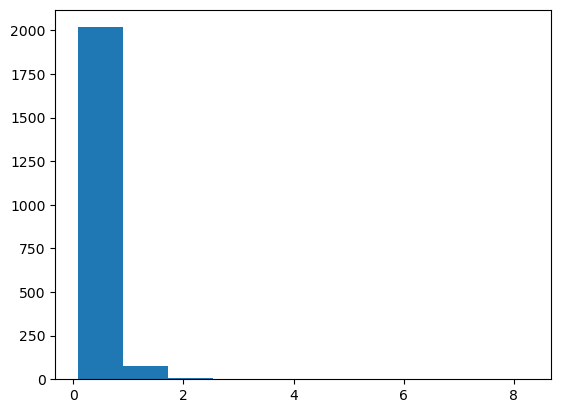

In [14]:
plt.hist(ds_optimising.where((~ds_optimising['coeff for emergence'].isin([np.inf, -np.inf]))*(ds_optimising['coeff for emergence']<10))['coeff for emergence'])#, bins = 20)#[[f't_dev at day {n}' for n in range(200, 300)]]

In [15]:
print(ds_optimising['coeff for emergence'].where(~ds_optimising['coeff for emergence'].isin([np.inf, -np.inf])).dropna().mean(),
      ds_optimising['coeff for flowering'].where(~ds_optimising['coeff for flowering'].isin([np.inf, -np.inf])).dropna().mean(),
      ds_optimising['coeff for ripeness'].where(~ds_optimising['coeff for ripeness'].isin([np.inf, -np.inf])).dropna().mean())

1.008325157733615 0.03658492936480077 0.04598812328016307


In [16]:
print(ds_optimising['coeff for emergence'].where(~ds_optimising['coeff for emergence'].isin([np.inf, -np.inf])).dropna().sample(frac=0.5, replace=False).mean(),
      ds_optimising['coeff for flowering'].where(~ds_optimising['coeff for flowering'].isin([np.inf, -np.inf])).dropna().sample(frac=0.5, replace=False).mean(),
      ds_optimising['coeff for ripeness'].where(~ds_optimising['coeff for ripeness'].isin([np.inf, -np.inf])).dropna().sample(frac=0.5, replace=False).mean())

0.5224664530661277 0.03679363293654118 0.04609247795575865


In [9]:
Maize_set.driver_frame_for_ML.dropna(subset = ['t2m day 0', 'observed time to beginning of flowering'])

,Referenzjahr,Stations_id,t2m day 0,t2m day 1,t2m day 2,t2m day 3,t2m day 4,t2m day 5,t2m day 6,t2m day 7,...,lat,lon,WC SOS,observed time to beginning of flowering,observed time to yellow ripeness,emergence date,index,1,2,3
0,2018,7521.0,8.120025,9.939544,10.950083,14.139244,15.773655,16.335490,11.732658,11.085273,...,54.4333,9.8167,2018-04-15,63.0,108.0,2018-05-16,1168.0,6.0,23.0,26.0
2,2018,7592.0,10.922219,11.834785,12.222355,15.646608,17.160594,18.613257,13.832406,14.057785,...,53.4833,10.6333,2018-04-15,73.0,NaN,2018-05-09,1176.0,5.0,8.0,22.0
4,2018,7623.0,7.296997,8.153608,9.499900,10.779305,13.222063,16.031335,14.912643,10.333736,...,54.6667,9.1333,2018-04-14,57.0,101.0,2018-05-16,1188.0,7.0,25.0,28.0
8,2018,7650.0,9.047308,9.000225,11.001043,14.564890,15.288866,17.350146,12.384319,11.619438,...,54.1000,10.8167,2018-04-15,55.0,NaN,2018-05-15,1203.0,6.0,21.0,25.0
9,2018,7662.0,10.081076,11.064128,11.900764,15.448747,17.400507,17.795941,12.594860,13.485576,...,53.7333,9.7833,2018-04-15,67.0,NaN,2018-05-12,1207.0,5.0,13.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,2023,19587.0,8.619230,8.965848,7.935543,5.424142,8.375292,13.165038,12.760963,10.014807,...,48.7091,9.2147,2023-04-17,49.0,123.0,2023-05-27,1157.0,12.0,21.0,33.0
4743,2023,19612.0,8.005281,8.702751,8.217714,6.974363,7.396445,12.911571,15.088900,14.059357,...,52.0507,10.6362,2023-04-16,84.0,121.0,2023-05-18,1160.0,9.0,26.0,35.0
4745,2023,19700.0,5.713335,5.448902,5.580967,11.116664,13.444157,12.497634,9.555045,6.330438,...,50.4316,11.9443,2023-04-18,78.0,132.0,2023-05-19,1163.0,15.0,33.0,36.0
4746,2023,19722.0,4.639520,8.890347,12.034398,11.776999,9.284203,6.104116,6.753432,10.141732,...,47.8655,9.0147,2023-04-20,55.0,109.0,2023-05-21,1164.0,11.0,19.0,33.0


In [3]:
address1 = "C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Mais_akt.txt"
address2 = "C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\PH_Jahresmelder_Landwirtschaft_Kulturpflanze_Mais_1936_2023_hist.txt"
pd1 = pd.read_csv(address1, encoding = "latin1", engine='python', sep = r';\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')
pd2 = pd.read_csv(address2, encoding = "latin1", engine='python', sep = r';\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;')
pd3 = pd.concat([pd1, pd2], axis = 0)
pd3 = pd3.drop('Unnamed: 9', axis = 1)
pd3.drop_duplicates(inplace=True)
pd3.to_csv('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\maize_phenology_20250224.csv')
address3 = 'C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\maize_phenology_20250224.csv'
pd4 = pd.read_csv(address3)

In [78]:
phase_list2 = ['emergence', 'beginning of flowering', 'yellow ripeness']
thresholds = [0.1, 1, 2]
RMSE_list = []
coord_list = []
Maize_set.get_observed_dataset()
for coeff_1 in np.arange(0.02, 0.09, 0.005):
    for coeff_2 in np.arange(0.02, 0.09, 0.005):
        print([coeff_1, coeff_2])
        resps = [lambda x: coeff_1*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36), lambda x: coeff_1*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36), lambda x: coeff_2*modelling_fctns.Wang_Engel_Temp_response(x, 8, 28, 36)]
        #[lambda x: 0.0254*modelling_fctns.Wang_Engel_Temp_response(x, 0, 27.5, 40), lambda x: 0.0289*modelling_fctns.Wang_Engel_Temp_response(x, 0, 33, 44)]#0.0254, 0.0289
        Maize_set.dev_under_response(lambda x, y: modelling_fctns.phase_dependent_response(x, y, resps, thresholds), 
                                    'tas', thresholds[-1])
        Maize_set.get_phase_dates(thresholds)
        for index, phase in enumerate(phase_list2):
            Maize_set.phase_dates_array = Maize_set.phase_dates_array.rename(columns={str(np.float64(thresholds[index])):f'modelled time to {phase}'})
        Maize_set.phase_dates_array = Maize_set.phase_dates_array.where(Maize_set.phase_dates_array['modelled time to yellow ripeness'] < 200)
        Maize_set.phase_dates_array['modelled time to beginning of flowering'] = Maize_set.phase_dates_array['modelled time to beginning of flowering'] - Maize_set.phase_dates_array['modelled time to emergence']
        Maize_set.phase_dates_array['modelled time to yellow ripeness'] = Maize_set.phase_dates_array['modelled time to yellow ripeness'] - Maize_set.phase_dates_array['modelled time to beginning of flowering']
        ds_comparison = pd.merge(Maize_set.ds_observed, Maize_set.phase_dates_array, how='outer', on=['Referenzjahr', 'Stations_id'])
        ds_comparison = ds_comparison.dropna(subset = ['modelled time to beginning of flowering', 'lat', 'lon'])
        ds_comparison = dataset_fctns.add_SOS_to_df(ds_comparison)
        ds_comparison['observed time to emergence'] = pd.to_datetime(ds_comparison['emergence date']).dt.dayofyear - ds_comparison['SOS']
        RMSE_list.append(RMSE_model2(ds_comparison, phase_list2))
        coord_list.append([coeff_1, coeff_2])



[0.02, 0.02]
Couldn't reset index for station


c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\dataset_fctns.py:107: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[104. 104. 103. ... 105. 105. 105.]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  df.loc[:, 'SOS'] = WC_SOS(df['lon'], df['lat'])
c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta


[0.02, 0.025]
Couldn't reset index for station


c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta


[0.02, 0.030000000000000002]
Couldn't reset index for station


c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta


[0.02, 0.035]
Couldn't reset index for station


c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta


[0.02, 0.04000000000000001]
Couldn't reset index for station


c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta


[0.02, 0.045000000000000005]
Couldn't reset index for station


c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\modelling_fctns.py:16: RuntimeWarning: invalid value encountered in power
  f_T = ( ( (2*(T - T_min)**alpha)*((T_opt - T_min)**alpha) - ((T - T_min)**(2*alpha)) ) / ((T_opt - T_min)**(2*alpha)) )**beta


KeyboardInterrupt: 

In [ ]:
phase_dates_array
        ds_comparison = pd.merge(Maize_set.ds_observed, Maize_set.phase_dates_array, how='outer', on=['Referenzjahr', 'Stations_id'])
        ds_comparison = ds_comparison.dropna(subset = ['modelled time to beginning of flowering', 'lat', 'lon'])
        ds_comparison = dataset_fctns.add_SOS_to_df(ds_comparison)
        ds_comparison['observed time to emergence'] = pd.to_datetime(ds_comparison['emergence date']).dt.dayofyear - ds_comparison['SOS']
        RMSE_list.append(RMSE_model2(ds_comparison, phase_list2))
        coord_list.append([coeff_1, coeff_2])

In [22]:
print(coord_list[np.linalg.norm(np.array(RMSE_list), axis = 1).argmin()],
      RMSE_list[np.linalg.norm(np.array(RMSE_list), axis = 1).argmin()])

[0.02, 0.02] [nan, nan, nan]


In [25]:
ds_comparison#.dropna(subset = ['modelled time to beginning of flowering'])

,Referenzjahr,Stations_id,observed time emergence to beginning of flowering,observed time emergence to yellow ripeness,lat,lon,emergence date,modelled time to emergence,modelled time to beginning of flowering,modelled time to yellow ripeness
0,1951.0,7617.0,29.0,NaN,54.6167,9.0333,NaT,NaN,NaN,NaN
1,1951.0,7899.0,80.0,NaN,52.0833,9.5667,NaT,NaN,NaN,NaN
2,1951.0,8137.0,50.0,NaN,52.8667,9.6000,NaT,NaN,NaN,NaN
3,1951.0,8191.0,54.0,NaN,53.2667,10.1167,NaT,NaN,NaN,NaN
4,1951.0,8234.0,98.0,NaN,52.9333,11.1167,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
28902,2023.0,19612.0,84.0,121.0,52.0507,10.6362,2023-05-18,38.0,76.0,114.0
28903,2023.0,19700.0,78.0,132.0,50.4316,11.9443,2023-05-19,49.0,85.0,128.0
28904,2023.0,19722.0,55.0,109.0,47.8655,9.0147,2023-05-21,38.0,71.0,107.0
28905,2023.0,19770.0,NaN,NaN,NaN,NaN,2023-05-20,36.0,74.0,113.0
